In [1]:
#@markdown instalacion paqutes
package = ['boto3','es_lemmatizer','pyodbc','prince',
           'pyLDAvis==2.1.2','gensim']
f= open("paquetes.txt","w+")

def install_txt(package):
  f= open("paquetes.txt","w+")
  for i in package:
    print(i)
    

    try:
        __import__(i)
        print('ya instalado {}'.format(i))
    except ImportError:
        # main(['install', package]) 
        f.write("{} \r\n".format(i))
        print('No instalado {}'.format(i))


install_txt(package)
!pip install -r paquetes.txt  

boto3
ya instalado boto3
es_lemmatizer
ya instalado es_lemmatizer
pyodbc
ya instalado pyodbc
prince
ya instalado prince
pyLDAvis==2.1.2
No instalado pyLDAvis==2.1.2
gensim


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


ya instalado gensim


#**Librerias**

In [2]:
#Librerias
import re
import numpy as np
import pandas as pd
import pandas_profiling
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import unicodedata
from es_lemmatizer import lemmatize
import spacy
import re
import pyodbc
import prince
import os
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import re #expresiones regulares
import itertools
from collections import Counter 
import seaborn as sns
import matplotlib as mpl
plt.style.use('ggplot')
sns.set_context("talk")
import datetime
import dateutil

#Librerias de visualizacion dinámica
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud
from pprint import pprint #Manipulacion de datos

#LDA MODEL FOR OBSERVACIONES
#quitar mas profundamente stop_words
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import unicodedata
import tqdm
import spacy.cli
from spacy.lang.es.stop_words import STOP_WORDS 
#descargamos los modelos
from nltk.corpus import stopwords
nltk.download('stopwords')

nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
spacy.cli.download("es_core_news_md")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
✔ Download and installation successful
You can now load the model

In [3]:
#@title Librerías modelo de LDA
## APLLY LDA MODEL TO OBSERVACIONES
#Gensim para modelado de temas, indexación de documentos y recuperación de similitudes con grandes corpus
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#Spacy para la lemmatization
import spacy
# Herramientas de graficado
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
# Habilitado de logging para gensim (opcional)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [4]:
#@title Librerías  modelo de Word2Vec
#word2vec modelo de EMBEDDING
#word2vec
from gensim.models import word2vec
import multiprocessing
from gensim.models import Word2Vec
from collections import defaultdict 
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
from pylab import rcParams
from google.colab import widgets

#**Rutas**

In [5]:
#Rutas en Drive colab
os.getcwd()

'/content'

In [6]:

Campaña_P  = "/content/Modelo Analítico PCP - Beneficio Educativo.xlsx"
nombres = "/content/drive/MyDrive/Ecopetro/Estefania/nombres_apellidos.txt"

In [7]:
os.chdir('/content/drive/MyDrive/Ecopetro/ECOPETROL_P/6. Reintegro')
os.getcwd()

'/content/drive/MyDrive/Ecopetro/ECOPETROL_P/6. Reintegro'

#**Funciones**

In [8]:
# CONEXION A SERVIDOR ###################################################################################
# def Conexion():
#     server = '172.27.48.148'
#     #database = 'bdcmp_NuevaEpsCrm' 
#     username = 'CienciaDatos' 
#     password = 'C13nc1aD47*5'  
#     cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';UID='+username+';PWD='+ password)
#     cursor = cnxn.cursor()
#     return cnxn


# DEFINICION DE PICOS Y FECHAS ##################################################################################
##Se definen fechas para realizar los respectivos filtros 
##cuando se extraiga la información correspondiente desde el servidor

def fechas(df_Tipo_OF):
    df_OF = df_Tipo_OF.astype(str).replace('NaT','20200101')
#######Operaciones financieras
    df_OF ['fecha_ini_1'] = df_OF['Picos de demanda  1'].replace(regex=r'-', value = '').replace('0','20200101')
    df_OF ['fecha_fin_1'] = ['20210401','20210301','20210301','20210301', '20210301', '20210301', '20210401']
    df_OF ['fecha_ini_2'] = df_OF['Picos de demanda  2'].replace(regex=r'-', value = '').replace('0','20200101')
    df_OF ['fecha_fin_2'] = ['20210501', '20210501', '20200101', '20210501', '20200101', '20210501', '20201001']
    df_OF ['fecha_ini_3'] = df_OF['Picos de demanda  3'].replace(regex=r'-', value = '').replace('0','20200101')
    df_OF ['fecha_fin_3'] = ['20210601', '20200101', '20200101', '20210601', '20200101', '20200101', '20210101']
    
    return df_OF  

## EXTRACCIÓN ########################################################################################################

def Extraccion(df_fechas, df_General, picos):
    #df_fechas : Nombre de la tabla con las tipologias seleccionadas y las fechas definidas correspondientes (con la función de fechas)
    #df_general : Nombre de tabla para cada campaña sin las fechas definidas 
    #picos : Número máximo de picos que se analizan [en OF son 2, en P son 3]
    
    query_base = "SELECT * FROM [172.27.90.50].[Ecopetrol_Reporting].[dbo].[Tbl_Ecopetrol_ResultadoBackOffice] "
    
    i = 0 
    cnxn = Conexion()
    query = "WHERE ([fgs_Nivel3] = '"+ df_fechas['Nivel 3'][i] + "') AND ([fgs_FechaInicio] BETWEEN '" + df_fechas['fecha_ini_1'][i]+ "' AND '" + df_fechas['fecha_fin_1'][i] +"')"  
    query_completa = query_base + query
    df_inicial = pd.read_sql(query_completa, cnxn)

    for j in range(1,picos+1):
        df_General["Datos_Pico_"+str(j)] = 0
        for i in range(0,len(df_fechas['Campaña'])):
            cnxn = Conexion()
            query = "WHERE ([fgs_Nivel3] = '"+ df_fechas['Nivel 3'][i] + "') AND ([fgs_FechaInicio] BETWEEN '" + df_fechas["fecha_ini_"+str(j)][i]+ "' AND '" + df_fechas["fecha_fin_"+str(j)][i] +"')"  
            query_completa = query_base + query
            df = pd.read_sql(query_completa, cnxn)
            df_total = pd.concat([df_inicial,df]).drop_duplicates()
            df_inicial = df_total
            df_General["Datos_Pico_"+str(j)][i] = df.shape[0] 
    print('Total de registros:', df_inicial.shape[0])
    print('Total de columnas:', df_inicial.shape[1])
            
    return df_total,df_General                 

# VALORES FALTANTES ###############################################################################################################################################################################################

def Valores_Faltantes(df, porcentaje):
    Faltantes = df.isnull().sum()
    df_Faltantes = pd.DataFrame({'Nombre_Columnas':Faltantes.index, 'Total_Vacios':Faltantes.values})#[df_Faltantes['Total_Vacios'] != 0]
    df_Faltantes = df_Faltantes[df_Faltantes['Total_Vacios'] != 0]

    df_Faltantes['Porcentaje_vacio'] = ((df_Faltantes['Total_Vacios']/df.shape[0])*100).round(2)
    df_Faltantes['Columna_vacia'] = 'NO'
    df_Faltantes.loc[df_Faltantes['Total_Vacios'] == df.shape[0], 'Columna_vacia'] = 'SI'
    
    print('Total columnas con valores faltantes :', df_Faltantes.shape[0])
    print('Total columnas vacias :', df_Faltantes[df_Faltantes['Columna_vacia'] == 'SI'].Columna_vacia.count())
    print('Total columnas no vacias con mas del ' + str(porcentaje) + '% de valores faltantes :', df_Faltantes[(df_Faltantes['Porcentaje_vacio'] >= porcentaje) & (df_Faltantes['Columna_vacia'] == 'NO') ].Columna_vacia.count())
    #print('Total columnas no vacias con menos del ' + str(porcentaje) + '% de valores faltantes :', df_Faltantes[(df_Faltantes['Porcentaje_vacio'] >= porcentaje) & (df_Faltantes['Columna_vacia'] == 'NO') ].Columna_vacia.count())
    
    return df_Faltantes

# ELIMINAR COLUMNAS##############################################################################################

#para eliminar columnas seleccionadas
def Eliminar_columnas(df, lista_columnas):
    df_drop = df.drop(columns = lista_columnas)
    print ('Cantidad de columnas iniciales : ', df.shape[1])
    print ('Cantidad despues de eliminar : ', df_drop.shape[1] )
    return df_drop
### elimincacion 100 valores nulos, cardinalida100, cardinalidad 1
def eliminacion_columnas(tabla):
  cardinalidad100 = tabla[tabla['% de valores diferentes']==100]
  cardinalidad1 = tabla[tabla['# de valores diferentes']==1]
  vacios = tabla[tabla['% de datos nulos']==100]
  variables_eliminar=vacios.index.tolist()+cardinalidad1.index.tolist()+cardinalidad100.index.tolist()# no aportan informacion
  print('numero de variables a eliminar : {}'.format(len(variables_eliminar)))
  return variables_eliminar
# columnas duplicadas
def columnas_dup(df):
    df_dup = df.T.duplicated().T
    return df_dup
#Para eliminar columnas duplicadas
def columnas_nodup(df):
    print ('Total de columnas antes de eliminar dup: ', df.shape[1])
    df_sindup = df.T.drop_duplicates().T
    print ('Total de columnas duplicadas : ', df.shape[1] - df_sindup.shape[1])
    print ('Total de columnas no duplicadas:', df_sindup.shape[1])
    return df_sindup    

def mytable(data):
    nulls = pd.DataFrame(data.isnull().sum()/data.shape[0]*100, columns=['% de datos nulos'])
    ceros = pd.DataFrame((data==0).sum()/data.shape[0]*100, columns=['% de ceros'])
    tipo = pd.DataFrame(data.dtypes,columns=['Tipo de datos'])
    val = pd.DataFrame(data.nunique(),columns=['# de valores diferentes'])
    valpor = pd.DataFrame(data.nunique()/data.shape[0]*100,columns=['% de valores diferentes'])
    mis_val_table = pd.concat([nulls, ceros,tipo, val, valpor], axis=1)
    return mis_val_table

def creacion_tabla(x):
  tabla_x = mytable(x)
  print(x.shape)
  return tabla_x


def nonum(x):
 try:
   int(x)
   sal = False
 except:
    sal = True
 return sal 


def isnum(x):
 try:
   int(x)
   sal = True
 except:
    sal = False
 return sal 

def solo_num(x):
  try:
    sal = float(x)
  except:
    sal = np.nan
  return sal 
def creacion_tabla(x):
  tabla_x = mytable(x)
  print(x.shape)
  return tabla_x





#esta funcion quita stop words de cada una de las filas
def text_rows(texto, StopWords):
    texto = texto.split()
    resultwords  = [word for word in texto if word not in StopWords]
    texto = ' '.join(resultwords)
    return texto


def text (column, dic):
    column = column.astype(str)
    texto_base = " ".join(motivo for motivo in column)
    text = (unicodedata.normalize('NFKD', texto_base).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    text = re.sub(r"\bmedicas\b","medica",text)
    for i, j in dic.items():
        text = text.replace(i, j)
        
    return text
    
def listas (column, dic):
    Lista = []
    column = columna.astype(str)
    for motivo in column:
        inicial_answer = str(motivo)
        for i, j in dic.items():
            ini_answer = inicial_answer.replace(i, j)
        answer = (unicodedata.normalize('NFKD', ini_answer).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
        answer = re.sub(r"\bmedicas\b","medica",answer)
        answer = re.sub(r"\bmedicamentos\b","medicamento",answer)
        answer = re.sub(r'[^\w\s]','', answer).split()
        words = [word for word in answer if word not in stop_words]
        Lista.append(words)
    return Lista
    
#crea nube de palabras
def wordcloud(text, nombre, stopWords):
    # wordcloud = WordCloud(stopwords=stop_words+stopWords, background_color="white", width=1600, height=800,min_word_length =3 ).generate(text)
    wordcloud = WordCloud(stopwords=stop_words+stopWords, background_color="white", width=1600, height=800).generate(text)
    plt.figure( figsize=(15,10) )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.savefig("word_cloud_"+str(nombre)+".png") #dpi = 300)    

#crea n-gramas   
def ngrams(text, n, top,stopWords):
    #wnl = nltk.stem.WordNetLemmatizer()
    texto = re.sub(r'[^\w\s]','', text).split()
    stopwords = stop_words + stopWords
    words = [word for word in texto if word not in stopwords]
    
    n_grams_series = ((pd.Series(nltk.ngrams(words,n)).value_counts())[:top])
    plot = n_grams_series.sort_values().plot.barh(color ="tomato", width = 0.6, figsize = (20,18), edgecolor='grey')   #color=(0.2, 0.4, 0.6, 0.6)
    plot.set_xlabel('Frecuencia',  fontname="Calibri", fontsize=35)
    plot.set_title('TOP ' + str(top) +' de '+str(n)+'-GRAMAS QUE APARECEN CON MAYOR FRECUENCIA', fontname="Calibri", fontsize=40)
    plot.title.set_position([.5, 1.05])
    for tick in  plot.get_xticklabels():
        tick.set_fontname("Calibri")
        tick.set_fontsize(35)
    for tick in  plot.get_yticklabels():
        tick.set_fontname("Calibri")
        tick.set_fontsize(35)
    #plt.savefig("graph.png") #dpi = 300)
    plt.figure( figsize=(15,10) )
    #plt.show()
    return n_grams_series
    #if n == 1 :
    #    return n_grams_series.to_frame().reset_index().rename(columns = {'index':'palabras', 0:'Conteo'})
    #elif n == 2:
    #    return n_grams_series.to_frame().reset_index().rename(columns = {'index':'Bigramas', 0:'Conteo'})
    #elif n > 2:
    #    return n_grams_series.to_frame().reset_index().rename(columns = {'index':'gramas', 0:'Conteo'})

def wordcloud_jose(x):
  lista_mensajeuser=[]
  
  long_string=''.join(x)
  sal = pd.Series(long_string.split(' ')).value_counts()
  saldic = sal.to_dict()
  #Creacion lista stop words
  wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=600, contour_width=50,
                        contour_color='steelblue', margin=15, stopwords=StopWords_total,width=1600, height=800)
  
  wordcloud2 = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=20, contour_width=50,
                      contour_color='steelblue', margin=15, stopwords=StopWords_total,width=1600, height=800)
  #Crear el word cloud
  #wordcloud.generate(long_string)
  wordcloud.generate_from_frequencies(saldic)
  wordcloud2.generate_from_frequencies(saldic)
  # wordcloud.generate(saldic)
  #Visualizar el word cloud
  plt.figure( figsize=(15,10) )
  
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  
  plt.figure( figsize=(15,10) )
  plt.imshow(wordcloud2, interpolation='bilinear')
  plt.axis("off")
  plt.show()


def plot_10_most_common_words(count_data, count_vectorizer):
   #Grafico de frecuencias
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    fig = px.bar( x=words, y=counts, color_discrete_sequence=["#25427B","#33BBFF","#EBECED"], title='TÉRMINOS MÁS COMUNES EN:'+' '+segmento,  labels=dict(x="Palabra Clave", y="Frecuencia", color="Place")) #COLORES DE ECOPETROL, PUEDES VARIAR LOS COLORES
    fig.write_html(segmento+"_.html")
    fig.show()
    return words,counts



def sent_to_words(sentences):
      for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def adjustment_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text


# **EXTRACCIÓN**

In [9]:
# observador_personal  = '/content/drive/MyDrive/Ecopetro/Estefania/Observaciones_LimpiezaInicial_Personal.csv'
observador_personal  ='/content/drive/MyDrive/Ecopetro/ECOPETROL_P/Observaciones_LimpiezaInicial_Personal.csv'

In [10]:
beneficios = pd.read_csv(observador_personal)
beneficios.head()

,fgs_IdGestion,fgs_Nivel3,ObservacionCreacion_limpieza1,ObservacionSolucion_limpieza1,ObservacionEscalamientoN2_limpieza1,# palabras_ObsCreacion_sinLim,# palabras_ObsSolucion_sinLim,# palabras_ObsEscalamientoN2_sinLim,# palabras_ObsCreacion_limpieza1,# palabras_ObsSolucion_limpieza1,# palabras_ObsEscalamiento_limpieza1
0,13908445,Legal / Reconocimiento Pensionados (Incluye Su...,se recibe documentacion del senor joaquin erne...,se informa que su caso no puede ser tramitado...,vacio,18,228,1,18,238,1
1,13908527,Legal / Reconocimiento Pensionados (Incluye Su...,solicito el ajuste de semestre y se encuentra ...,se realizo el ajuste de semestre y se encuentr...,vacio,12,13,1,12,13,1
2,13908581,Legal / Reconocimiento Pensionados (Incluye Su...,se recibe solicitud de legalizacion semestre s...,se informa a la peticionaria que este caso fue...,vacio,20,17,1,18,16,1
3,13908589,Legal / Reconocimiento Pensionados (Incluye Su...,solicitud del usuario ayer envie este mismo do...,gestion realizada dando respuesta a la consult...,vacio,22,250,1,25,247,1
4,13908640,Legal / Reconocimiento Pensionados (Incluye Su...,se recibe solicitud de legalizacion de luisa f...,se informa que debe anexar certificacion de un...,vacio,10,27,1,10,27,1


In [11]:
mytable(beneficios[['fgs_IdGestion', 'fgs_Nivel3', 'ObservacionCreacion_limpieza1',
'ObservacionSolucion_limpieza1', 'ObservacionEscalamientoN2_limpieza1']])

,% de datos nulos,% de ceros,Tipo de datos,# de valores diferentes,% de valores diferentes
fgs_IdGestion,0.000000,0.0,int64,13748,100.000000
fgs_Nivel3,0.000000,0.0,object,20,0.145476
ObservacionCreacion_limpieza1,0.000000,0.0,object,11624,84.550480
ObservacionSolucion_limpieza1,0.014548,0.0,object,11031,80.237125
ObservacionEscalamientoN2_limpieza1,0.000000,0.0,object,2857,20.781205


## **GRUPOS**

In [12]:
GRUPOS = ['1. Legalización','1. Legalización','2. Solicitud de educación inclusiva'
          ,'3. Anticipo','3. Anticipo','3. Anticipo','3. Anticipo'
          ,'4. Consulta','4. Consulta','4. Consulta','4. Consulta','4. Consulta'
          ,'4. Consulta','4. Consulta','5. Soporte Plataforma'
          ,'6. Reintegro','6. Reintegro','7. Inscripción','7. Inscripción','7. Inscripción']

NIVELES = ['Legal / Reconocimiento Pensionados (Incluye Sustitutos)'
           ,'Legal / Reconocimiento Trabajadores (Incluye Bachiller ECP)'
           ,'Solicitud de educación inclusiva'
           ,'Anticipo Pensionados Educación Inclusiva','Anticipo Trabajadores Educación Inclusiva'
            ,'Anticipo Pensionados (Incluye Sustitutos)','Anticipo Trabajadores (Incluye BXC)'
            ,'Consulta Bachiller Ecopetrol (Incapacidad médica y/o Fuerza Mayor)'
            ,'Consulta de información relacionadas con reembolsos'
            ,'Consulta especialista beneficios atención PQRS'#quitar
            ,'Consulta sobre liquidación/pago préstamo para educación'#liquidacion pago prestamo
            ,'Consulta Titulares Beneficio Eductivo - Desvinculados'#
            ,'Consultas Titulares Beneficio Educativo (No Incluye Bachiller ECP)'
            ,'Solicitud / Consulta / revisión pagos colegios propiedad de Ecopetrol S.A.'
            ,'Soporte Plataforma para Instituciones Educativas vía TIB'
            ,'Reintegro de dinero Pensionados Educación (Incluye sustitutos y Auto)'
            ,'Reintegro de dinero trabajadores Educación (Incluye Bachiller ECP)'
            ,'Inscripción casos especiales comité de educación convencional activos'
            ,'Inscripción casos especiales comité educación convencional pensionados'
            ,'Inscripción solicitud becas Comité de Educación Convencional Activos']#inscripcion convencional (activos, pensionados, )
            #becas  convencional activos

#trabajadores, pensionados , sustituto sin incluye
dic_grupos = dict(zip(NIVELES,GRUPOS))

beneficios['GRUPOS'] = beneficios['fgs_Nivel3']
beneficios['GRUPOS'].replace(dic_grupos, inplace=True)

In [13]:
interes = beneficios[[ 'fgs_IdGestion','GRUPOS', 'ObservacionCreacion_limpieza1',
'ObservacionSolucion_limpieza1', 'ObservacionEscalamientoN2_limpieza1']].copy()

interes['ObservacionCreacion']=beneficios['ObservacionCreacion_limpieza1']#+" "+beneficios['fgs_Nivel3']
## no usar la tipologia

# interes['ObservacionSolucion_+_n2'] = beneficios['ObservacionSolucion_limpieza1']+' '+beneficios['ObservacionEscalamientoN2_limpieza1'].map(lambda x : x.replace('vacio',''))# aqui el problema
interes['ObservacionSolucion_+_n2'] = beneficios['ObservacionSolucion_limpieza1']+' '+beneficios['ObservacionEscalamientoN2_limpieza1']#.map(lambda x : re.sub(r'vacio', '', x))
# interes['ObservacionSolucion_+_n2'] = beneficios['ObservacionSolucion_limpieza1']+' '+beneficios['ObservacionEscalamientoN2_limpieza1'].str.replace('vacio', '',regex = True)


In [14]:
# texto = 'obserne'
# mapa = interes['ObservacionSolucion_+_n2'].astype(str).map(lambda x: x.find(texto))!=-1
# pd.DataFrame(interes[['ObservacionSolucion_+_n2','fgs_IdGestion'	]][mapa]).set_index('ObservacionSolucion_+_n2').head(2)

In [15]:
interes[interes['fgs_IdGestion'] ==13910437][['ObservacionEscalamientoN2_limpieza1']].set_index('ObservacionEscalamientoN2_limpieza1')

""
ObservacionEscalamientoN2_limpieza1
su caso fue escalado al area encargada con las siguientes observaciones muy buenas tardes se comunica la senora yudi cuadros torrado cc embargante el cual indica que le generaban el pago del alojamiento de la beneficiaria judit catalina cuadros el cual la fecha de pago era e la mesada pensional de enero


In [16]:
texto_total = interes['ObservacionCreacion_limpieza1'].astype(str).sum()
len(texto_total.split(' '))

449935

In [17]:
texto_total = interes['ObservacionSolucion_+_n2'].astype(str).sum()
len(texto_total.split(' '))

900866

In [18]:
interes.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionEscalamientoN2_limpieza1',
       'ObservacionCreacion', 'ObservacionSolucion_+_n2'],
      dtype='object')

In [19]:
interes = interes[['fgs_IdGestion','GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1',
       'ObservacionCreacion', 'ObservacionSolucion_+_n2',
       'ObservacionEscalamientoN2_limpieza1']].copy()

In [20]:

# for i in interes.columns:
#   display(interes[i].value_counts())
#   print('_'*100)

In [21]:

for i in interes.columns:
  display(pd.DataFrame(interes[i].value_counts()))
  print('_'*100)

  # si hay cambios

,fgs_IdGestion
13961215,1
13556590,1
13113524,1
13994852,1
13286242,1
...,...
13121004,1
14028267,1
13960682,1
13999593,1


____________________________________________________________________________________________________


,GRUPOS
1. Legalización,6610
3. Anticipo,3428
4. Consulta,1348
5. Soporte Plataforma,1121
7. Inscripción,466
2. Solicitud de educación inclusiva,414
6. Reintegro,361


____________________________________________________________________________________________________


,ObservacionCreacion_limpieza1
solicita informacion de plan educacional,283
solicita informacion,195
se recibe por parte de oficina virtual solicitud legalizacion plan educacional,169
legalizacion plan educacional,125
referente al caso requiere el estado de la solicitud,80
...,...
gestion su caso se escalo al area encargada para su tramite con las siguientes observaciones cordialmente solicito revisar a la menor brevedad en la plataforma kactus el proceso de legalizacion de la matricula del de mi hija paula a molina luna con la universidad el rosario teniendo en cuenta que no ha sido posible hacer el cargue de la informacion academica en la plataforma por parte de la u rosaro porque esta arrojado por parte de ecopetrol lo siguiente para este nivel y grado de escolaridad ya se reconocio el beneficio educativo considero que hay un error teniendo en cuenta que se esta haciendo el proceso correspondiente es al semestre que acaba de empezar cabe aclarar que el calculo debe hacerse por creditos agradezco su atencion y gestion lo antes posible toda vez que ya empezaron a descontarme por nomina el valor de la matricula ver adjunto correo de legalizacion del semestre pasado correo de la u r solicitud de este semestre asignacion del materias y pago de matricula,1
toledo carrillo fabrizio javier quiere validar el correo recibios de devolucion de plan educacional,1
no fue posible crear la solicitud de anticipo plan educacional para mi hija laura sofia palacios alonso cc en la herramienta kactus mas adelante el pantallazo evidenciando lo dicho cabe anotar que en kactus aparece como si el vencimiento de este benefico es decir la vigencia fuera hasta el es de precisar que mi hija cumplio anos el mes pasado yo realice el tramite respectivo para hacer la actualizacion en el sistema adjuntando los documentos pertinentes tanto en autoservicio como en empleado central ya esta actualizada la informacion y mi hija tiene el beneficio vigente hasta octubre del presente ano sin embargo al parecen en kactus no se ha actualizado dicho lo anterior solicito tramitar el anticipo del plan educacional de acuerdo al archivo adjunto que incluye formato de solicitud acuerdo de compromiso carta de aceptacion de la universidad pensum academico recibo de pago,1
se recibe por correo oficina virtual solicitud muy amablemente me dirijo a ustedes nuevamente para solicitar una revision del reconocimiento del plan educacional pues el colegio cargo unos valores de reconocimiento de matricula por por cada nino y valores pension por de pesos el reconocimiento me llego para aceptacion por un valor de por la matricula es decir el mismo valor de la pension realmente ahora que los ninos fueron incluidos bajo el beneficio de educacion inclusiva resulta un beneficio inferior con respecto al beneficio como educacion regular teniendo en cuenta que desde el de enero de fue cargada la informacion por parte del colegio pero hasta el de febrero fue que recibi la aprobacion del beneficio educacional tome la decision de rechazar los valores a reconocer porque difieren tanto en el valor de matricula como en el beneficio total a recibir cabe aclarar que el valor que tiene el colegio por matricula los ninos es referente a los servicios educativos ademas de incluir las herramientas tecnologicas de seguimiento y control academico de los ninos como tambien la plataforma academica para desarrollo de actividades y guias educativas nada de esto tiene que ver con transporte semi internado y demas descripciones del formato de transferencia de informacion pues todos estos valores son pagan de forma independiente tambien quiero informar que en vista de todo esto tome la decision de decirle al colegio que no cargue la informacion del beneficio de los ninos como educacion inclusiva sino que se siga cargando como educacion regular porque realmente no veo ningun apoyo mayor a lo anteriormente reconocido pero el colegio me informa que ahora el perfil de los ninos se encuentra bloqueado agradezco por favo

____________________________________________________________________________________________________


,ObservacionSolucion_limpieza1
se procede a dar cierre segun correo adjunto,338
se adjunta respuesta enviada,226
buen dia en atencion a su solicitud nos permitimos informarle que su caso se encuentra radicado para el proximo comite de educacion el cual se llevara a cabo durante el segundo semestre de una vez analizado se procedera a enviar respuesta a traves de nuestros canales de comunicacion para servicios compartidos es un placer atenderle le deseamos un feliz dia,155
se procede a validacion cumplimiento de los requisitos,90
se adjunta la gestion del caso,74
...,...
en atencion a su solicitud le informamos los procesos que se encuentran en gestion con el area de plan educacional son los siguientes caso radicado bajo no reconocimiento examen obligatorio de ingles beneficiario santiago villamizar paez fecha de vencimiento de caso de diciembre de caso radicado bajo no reconocimiento curso de ingles beneficiaria sofia villamizar paez fecha de vencimiento de caso de diciembre de en cuanto al proceso de legalizacion de plan educacional del beneficiario santiago villamizar paez adjunto formato gth f v el cual debe de ir firmado por el titular y la universidad en caso de que la institucion no diligencie ni firme el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico a original de recibo de pago que especifique el valor ordinario por concepto de derechos de grado de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la universidad que detalle el valor ordinario cancelado por concepto de derechos de grado recuerde que la universidad de la sabana cuenta con el servicio de transferencia de informacion motivo por el cual la institucion podra cargar la legalizacion por medio de la herramienta kactus y usted como titular solo aprobara dichos valores el descuento que se genera por nomina es por no legalizacion de plan educacional teniendo en cuenta que una vez generado el pago de anticipo se cuenta con dias para hacer el proceso una vez quede aprobado dicho proceso se reembolsara dichos valores,1
enviamos formato solicitado,1
solicita saber como va la solicitud de reconocimiento de plan educacional de su esposa con numero de caso se valida la solicitud esta en estado pendiente,1
se informa hay un escalamiento sobre consulta de si debe presentar informacion adicional bajo el radicado fecha maxima de respuesta,1


____________________________________________________________________________________________________


,ObservacionCreacion
solicita informacion de plan educacional,283
solicita informacion,195
se recibe por parte de oficina virtual solicitud legalizacion plan educacional,169
legalizacion plan educacional,125
referente al caso requiere el estado de la solicitud,80
...,...
gestion su caso se escalo al area encargada para su tramite con las siguientes observaciones cordialmente solicito revisar a la menor brevedad en la plataforma kactus el proceso de legalizacion de la matricula del de mi hija paula a molina luna con la universidad el rosario teniendo en cuenta que no ha sido posible hacer el cargue de la informacion academica en la plataforma por parte de la u rosaro porque esta arrojado por parte de ecopetrol lo siguiente para este nivel y grado de escolaridad ya se reconocio el beneficio educativo considero que hay un error teniendo en cuenta que se esta haciendo el proceso correspondiente es al semestre que acaba de empezar cabe aclarar que el calculo debe hacerse por creditos agradezco su atencion y gestion lo antes posible toda vez que ya empezaron a descontarme por nomina el valor de la matricula ver adjunto correo de legalizacion del semestre pasado correo de la u r solicitud de este semestre asignacion del materias y pago de matricula,1
toledo carrillo fabrizio javier quiere validar el correo recibios de devolucion de plan educacional,1
no fue posible crear la solicitud de anticipo plan educacional para mi hija laura sofia palacios alonso cc en la herramienta kactus mas adelante el pantallazo evidenciando lo dicho cabe anotar que en kactus aparece como si el vencimiento de este benefico es decir la vigencia fuera hasta el es de precisar que mi hija cumplio anos el mes pasado yo realice el tramite respectivo para hacer la actualizacion en el sistema adjuntando los documentos pertinentes tanto en autoservicio como en empleado central ya esta actualizada la informacion y mi hija tiene el beneficio vigente hasta octubre del presente ano sin embargo al parecen en kactus no se ha actualizado dicho lo anterior solicito tramitar el anticipo del plan educacional de acuerdo al archivo adjunto que incluye formato de solicitud acuerdo de compromiso carta de aceptacion de la universidad pensum academico recibo de pago,1
se recibe por correo oficina virtual solicitud muy amablemente me dirijo a ustedes nuevamente para solicitar una revision del reconocimiento del plan educacional pues el colegio cargo unos valores de reconocimiento de matricula por por cada nino y valores pension por de pesos el reconocimiento me llego para aceptacion por un valor de por la matricula es decir el mismo valor de la pension realmente ahora que los ninos fueron incluidos bajo el beneficio de educacion inclusiva resulta un beneficio inferior con respecto al beneficio como educacion regular teniendo en cuenta que desde el de enero de fue cargada la informacion por parte del colegio pero hasta el de febrero fue que recibi la aprobacion del beneficio educacional tome la decision de rechazar los valores a reconocer porque difieren tanto en el valor de matricula como en el beneficio total a recibir cabe aclarar que el valor que tiene el colegio por matricula los ninos es referente a los servicios educativos ademas de incluir las herramientas tecnologicas de seguimiento y control academico de los ninos como tambien la plataforma academica para desarrollo de actividades y guias educativas nada de esto tiene que ver con transporte semi internado y demas descripciones del formato de transferencia de informacion pues todos estos valores son pagan de forma independiente tambien quiero informar que en vista de todo esto tome la decision de decirle al colegio que no cargue la informacion del beneficio de los ninos como educacion inclusiva sino que se siga cargando como educacion regular porque realmente no veo ningun apoyo mayor a lo anteriormente reconocido pero el colegio me informa que ahora el perfil de los ninos se encuentra bloqueado agradezco por favor una cola

____________________________________________________________________________________________________


,ObservacionSolucion_+_n2
se adjunta respuesta enviada vacio,226
se procede a validacion cumplimiento de los requisitos vacio,90
se revisa el adjunto y se procede a responder vacio,46
se le informa que su caso se encuentra en proceso en cuanto se cierre se le notificara a su correo electronico vacio,46
se le informa proceso vacio,38
...,...
se informa que debe diligenciar acuerdo de compromiso vacio,1
buen dia en atencion a su solicitud nos permitimos informar que se llevara su caso al proximo comite de educacion para su respectivo analisis y posterior respuesta de la decision tomada a traves de nuestros canales de comunicacion buen dia en atencion a su solicitud nos permitimos informar que se llevara su caso al proximo comite de educacion para su respectivo analisis y posterior respuesta de la decision tomada a traves de nuestros canales de comunicacion,1
se le valida y se le indica que no se evidencia ningun carge se le indica que se esta presentando un problema en la herramienta volver aintentar mas tarde vacio,1
estimado usuario ricardo andres mathus munoz en atencion a solicitud de revision para el reconocimiento de la opcion de grado para el titular y la beneficiaria maria alejandra zambrano alvarez al respecto informamos una vez revisado su caso se determina procedente el reconocimiento de la opcion de grado el pago se encuentra en proceso con la solic y para la segunda quincena de septiembre gestion su caso se escalo al area correspondiente con las siguientes observaciones buenas noches por favor tener en cuenta que proyecto de grado es una asignatura normal y una opcion de grado en este caso hacer un diplomado es aparte un requisito para poder graduarse por favor comunicarse con la universidad si no tienen clara la metodologia antes de rechazar un proceso que por cierto es muy lento con ustedes espero por favor investiguen y me den solucion para el caso de mi esposa y mio gracias,1


____________________________________________________________________________________________________


,ObservacionEscalamientoN2_limpieza1
vacio,10752
gestion su caso se escalo al area encargada para su tramite con las siguientes observaciones cordial saludo adjunto para ser tratado en el comite de educacion de octubre de,20
gestion su caso se escalo al area encargada para su tramite con las siguientes observaciones buenas noches senores oficina virtual saludos adjunto envio solicitudes de becas posgrado trabajador core para su revision y adjudicacion en el proximo comite agradeciendo la atencion atentamente luis alexander escobar leal comisionado educacion de refinacion,15
sin observaciones,14
se crea caso de acuerdo a solicitud de correo adjunto,9
...,...
gestion su caso se escalo al area encargada para su tramite con las siguientes observaciones espero te encuentres bien deseandote un feliz ano marthica hoy inicio clases mi hija maria paula y quisiera acudir a ustedes para solicitar un apoyo presencial teniendo en cuenta que siguen en estudio virtual la verdad es muy complicado estar atendiendo mi parte laboral y estar acompanandola a ella durante el pude acompanarla hasta junio pero en el segundo semestre por la carga laboral y temas de salud fue muy complicado agradezco me indiquen de que forma puedo solicitar ese apoyo presencial en casa para ella y que pueda continuar sus estudios de antemano muchas gracias por tu apoyo,1
gestion su caso se escalo al area encargada para su tramite con las siguientes observaciones buen dia los datos son milton sanchez navarro cc en este caso debo esperar a que solucionen ese tema saludos jhon jairo jimenez alvarez,1
gestion su caso se escalo al area encargada para su tramite con las siguientes observaciones buenas tardes por favor solicito su gran colaboracion con el siguiente tema mi hija maria daniela gutierrez martinez quien estudia psicologia en la universidad catolica de pereira al montar en la plataforma de convenio ecopetrol universidad la persona que sube esta documentacion en el momento de matricularse en quinto semestre con numero de solicitud lo coloco como octavo semestre y fue aprobado asi por lo que ahora que se matriculo en octavo el sistema le dice a la universidad que ya fue pagado este semestre agradezco a las personas que me pueden colaborar corrigiendo este himpase para que la universidad pueda subir la informacion a plataforma julio gabriel gutierrez porras operador senior planta herveo,1
se recibe solicitud de legalizacion de john jairo sandoval medina se adjunta documentacion,1


____________________________________________________________________________________________________


In [22]:
original =interes.copy()

## Limpieza nivel general

In [23]:
# crecion columna = creacion + nivel 3


## Pipe line de limpieza

In [24]:
pd.DataFrame(interes['ObservacionCreacion'].value_counts()).head(5)

,ObservacionCreacion
solicita informacion de plan educacional,283
solicita informacion,195
se recibe por parte de oficina virtual solicitud legalizacion plan educacional,169
legalizacion plan educacional,125
referente al caso requiere el estado de la solicitud,80


In [25]:
# trabajadores, pensionados , sustitutos.(incuyecon )
#Pensionados (Incluye Sustitutos) solicita informacion dejar.

In [26]:
pd.DataFrame(interes['ObservacionSolucion_+_n2'].value_counts()).head(5)

,ObservacionSolucion_+_n2
se adjunta respuesta enviada vacio,226
se procede a validacion cumplimiento de los requisitos vacio,90
se revisa el adjunto y se procede a responder vacio,46
se le informa que su caso se encuentra en proceso en cuanto se cierre se le notificara a su correo electronico vacio,46
se le informa proceso vacio,38


In [27]:
original.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionCreacion',
       'ObservacionSolucion_+_n2', 'ObservacionEscalamientoN2_limpieza1'],
      dtype='object')

In [28]:
# interes, original = eliminacion_stopwords()
#Eliminamos los espacios al inicio y al final de cada strig

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('(','') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('(','') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace(')','') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace(')','') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('/','') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('/','') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('  ',' ') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('  ',' ') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)




In [29]:
print(
sum(interes['ObservacionSolucion_+_n2'].astype(str).map(lambda x : len(x.split(' ')))),
sum(interes['ObservacionCreacion'].astype(str).map(lambda x : len(x.split(' ')))),
)

900856 454089


In [30]:
stop_words=[]
guiones =[]

guiones+=['gestion su caso se escalo al area encargada para su tramite con las siguientes observaciones',
          'se envia respuesta adjunta por correo oficina virtual desde servicios compartidos queremos solucionar todos tus requerimientos de acuerdo con su solicitud de',
          'requisitos reconocimiento plan educacional estudios superiores formulario diligenciado y firmado por el titular y por la institucion en caso de que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico falta como se le indica debe adjuntar la certificacion con la informacion solicitada semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico ya que el formato no lo firma el plantel educativo la certificacion que presenta faltan dados solicitados uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco escanearlo mejor b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matricula c certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad debe anexar programa academico pensum malla curricular en caso de beca postgrado hijos para personal beneficiario de la convencion adjuntar copia del diploma o acta de grado para bachilleres ecopetrol anexar certificado de promedio certificado de la carrera nota en caso de presentar alguna restriccion en el aplicativo se agradece enviar toda la documentacion requerida para este tramite en un solo archivo pdf peso maximo mb junto con el print del error presentado donde agrupe la totalidad de los soportes exigidos por favor no enviar archivos separados al correo electronico de oficina virtual de personal con el fin de brindarle toda la asistencia necesaria a su requerimiento oficinavirtualdepersonal ecopetrol com co vacio',
        
          'le informamos que para proceder a tramitar la solicitud debe enviar nuevamente todos los documentos junto con el pantallazo del error requisitos reconocimiento plan educacional estudios superiores formulario diligenciado y firmado por el titular y por la institucion en caso de que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico',
          'desde servicios compartidos mantenemos una comunicacion y oportuna con nuestros clientes por eso a continuacion encontrara toda informacion relacionada con',
          'ingresa a autoservicioingrese usuario y contrasena redseleccione pestana beneficio modulo beneficio educativoseleccione su beneficiario dando clic opcion crear solicitud y continue proceso caso que presente inconvenientes con ingreso a autoservicio tomar captura pantalla error y enviar al buzon habilitado oficinavirtualdepersonal com co con documentos pertinentes por este medio un solo archivo formulario diligenciado y firmado por titular y por caso que no diligencie formulario debera presentar certificacion avance que conste informacion formulario semestre a cursar periodo lectivo valor por matricula ordinaria programa academico uno siguientes documentos a original recibo pago que especifique valor ordinario matricula con respectivos sellos banco caso pagos electronicos debe presentar soporte transferencia donde se observe que transaccion fue exitosa o aceptada anexando documento que detalle valor ordinario matriculac certificacion emitida por donde indique valor matricula ordinaria cancelada solicitudes primer semestre cambio o certificado admision o carta aceptacion por parte debe anexar programa academico pensum malla curricular',
          'dando alcance al correo precedente nos permitimos informarle que',
          'new party has joined the session',
          'sala chat breve sera atendido'
          'su interaccion quedo registrada bajo el numero lo invito a calificar nuestro servicio en la siguiente encuesta '
          ]

guiones+=['nos permitimos informarle que en atencion a su' 
          'puede realizarlo ingresa a autoservicioingrese usuario y contrasena de redseleccione la pestana beneficio educativo modulo beneficio educativoseleccione el beneficiario dando clic en la opcion crear solicitud y continue el procesoen caso que presente inconvenientes con el ingreso a autoservicio tomar captura de pantalla del error y enviar por el buzon habilitado oficinavirtualdepersonal ecopetrol com co con los documentos pertinentes en un solo archivo pdf formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matriculac certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad certificado de admision o carta de aceptacion por parte de la institucion educativa debe anexar programa academico pensum malla curricular todos los documentos deben ser adjuntados en un solo archivo pdf con peso no mayor a mb vacio',
          'puede realizarlo ingresa a autoservicioingrese usuario y contrasena de redseleccione la pestana beneficio educativo modulo beneficio educativoseleccione el beneficiario dando clic en la opcion crear solicitud y continue el procesoen caso que presente inconvenientes con el ingreso a autoservicio tomar captura de pantalla del error y enviar por el buzon habilitado oficinavirtualdepersonal ecopetrol com co con los documentos pertinentes en un solo archivo pdf formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matriculac certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad certificado de admision o carta de aceptacion por parte de la institucion educativa debe anexar programa academico pensum malla curricular todos los documentos deben ser adjuntados en un solo archivo pdf con peso no mayor a mb vacio',
          'ingresa a autoservicioingrese usuario y contrasena de redseleccione la pestana beneficio educativo modulo beneficio educativoseleccione su beneficiario dando clic en la opcion crear solicitud y continue el proceso en caso que presente inconvenientes con el ingreso a autoservicio tomar captura de pantalla del error y enviar al buzon habilitado oficinavirtualdepersonal ecopetrol com co con los documentos pertinentes por este medio en un solo archivo formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matriculac certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad certificado de admision o carta de aceptacion por parte de la institucion educativa debe anexar programa academico pensum malla curricular caida vpn perdida de la llamada vacio',
          'formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matricula c certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad debe anexar programa academico pensum malla curricular vacio',
          'cordial saludo en atencion a su comunicado nos permitimos',
          'desde servicios compartidos mantenemos una comunicacion clara y oportuna con nuestros clientes por eso a continuacion encontrara toda la informacion relacionada con la solicitud referente a',
          'desde servicios compartidos mantenemos una comunicacion clara y oportuna con nuestros clientes',
          'sus opiniones son importantes para nosotros con el fin de seguir apuntando nuestros esfuerzos a la mejora de los servicios ofrecidos',
          'queremos informarle que desde el contact center disponemos de varios canales de contacto para la atencion de solicitudes relacionadas con servicios al personal',
          'requisitos reconocimiento plan educacional estudios superiores formulario diligenciado y firmado por el titular y por la institucion en caso de que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico',
          'certificacion con la informacion solicitada semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico ya que el formato no lo firma el plantel educativo falta la certificacion valor cancelado matricula',
          'canales telefonicos linea gratuita nacional linea directa bogota',
          'canal correo electronico oficinavirtualdepersonal ecopetrol com co',
          'dando alcance al correo precedente nos permitimos informarle que para',
          'se informa que',
          'su caso se escalo al area encargada para su tramite con las siguientes observaciones',
          'https gestiondepersonal ecopetrol com co',
          'link https gestiondepersonal com co',
          'buen dia','oficinavirtual com co','buen dia atencion',
          'siguientes observaciones',
          'siguientes observaciones',
          'caso escalo',
          'caso escalado',
          'com co',
          'desde servicios compartidos queremos solucionar todos tus requerimientos acuerdo',
          'valor ordinario',
          'buenas tardes',
          'buenos dias',
          'cordial saludo',
          'nos permitimos informarle',
          'oficina virtual',
          'he tratado',
          'quedo atento',
          'de manera atenta',
          'manera atenta',
          'por favor',
          'ha sido',
          'solicitud recibida registrada bajo numero',
          'solicitud recibida registrada bajo numero adjunto',
          'recibiras confirmacion estado tu tramite durante tiempo maximo dias contados partir fecha solicitud',
          'le recordamos que a la fecha presenta un', 
           'del periodo lectivo a por el beneficiario a',
          'usuario contrasena',
          'adjuntando documentacion unico archivo pdf formulario diligenciado firmado diligencie formulario debera certificacion avance conste informacion formulario semestre cursar periodo lectivo valor matricula ordinaria programa academico original recibo pago especifique matricula sellos banco pagos electronicos soporte transaccion exitosa aceptada documento detalle matricula certificacion emitida valor matricula ordinaria cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular',
          'documento generado por la universidad en donde consta la informacion del semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico recibo de pago en donde se especifica el valor ordinario de matricula de la institucion el respectivo sello de cancelado del banco factura electronica de venta expedida por la universidad libre acta matricula con horario',
          'ustedes dicen',
          'periodo lectivo',
          'bajo numero adjunto segun diferente asegure',
          'bajo numero',
          'continuacion relacionamos requisitos cuales tambien puede validar respaldo formulario gth formulario diligenciado firmado diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula ordinaria programa academico original recibo pago espeficique matricula sellos banco pagos electronicos soporte transaccion exitosa aceptada documento detalle matricula certificacion emitida valor matricula ordinaria cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular beca postgrado hijos beneficiario convencion adjuntar copia diploma acta grado bachilleres anexar certificado promedio certificado revisando documentacion enviada falta documento recibo pago especifique matriculauna vez tenga completos enviolos nuevamente todos archivo pdf oficinavirtualdepersonal mencionando inicial muchas hacer uso nuestros servicios invitamos continuar sus solicitudes medio portal servicios compartidos linea unica atencion desde servicios compartidos placer gestionar sus solicitudes agradecemos atencion prestada deseamos feliz dia anexan soportes',
          'has left the session',
          'recuerde hablo interaccion quedo registrada invito calificar nuestro servicio encuesta',
          'medio presente permito muy respetuosamente',
          'muy respetuosamente',
          'sellos banco pagos electronicos soporte transaccion exitosa aceptada documento detalle',
          'alguna falla error aplicativo usted podra envio toda documentacion requerida tramite archivo pdf peso maximo agrupe totalidad soportes exigidos',
          'numero cedula sin puntos ni espacios pensionados sustitutos bachilleres colombia embargantes contrasena recuerda deja da click recordar clave sistema envia automaticamente electronico registrado ante trabajadores directos mismo clave red',
          'diligenciado firmado diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada',
          'diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular',
          'diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular',
          'documentacion requerida tramite archivo pdf peso maximo junto print error presentado agrupe totalidad soportes exigidos envio archivos separados electronico fin brindarle toda asistencia necesaria requerimiento',
          'avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada solicitudes primer semestre cambio anexar programa academico',
          'certificacion avance informacion formulario semestre cursar valor matricula programa academico',
          'firmado diligencie formulario debera certificacion avance informacion formulario semestre cursar',
          'nos permitimos',
 ]


stop_words+=['no','de', 'la', 'el', 'que', 'a', 'en', 'se', 'y', 'por', 'para','donde', 'observe', 'debe', 'fue','un','al', 'le','es' ,'o','con',
             'su','lo','legal','consultas','ecp','via','consultas','vía','via','vacio','senora','mb','caso','gestion','este','comité','gracias',
             'me','mi','recibe','activos','ya','Legalización','legalización','legalizacion','senor','senora','cc',
             'septiembre','agosto','sobre','como','esta','sr','comunica','buzon','cual','debido','indique',
             'remitidos','respectivos','uno','titular','fimrado','anexando','siguiente','recepcion','transferencia','si',
             'documentos','siguientes','encargada','area','solo','un','presentar','correo',
             'referente','buzon','area encargada','area','encargada','plan','educacional','firma','nombre',
             'pero','favor','agradezco','agradesco','cordialmente','quiere','par','una','tengo','uno','solo',
             'cuarto','lunes','martes','jueves','viernes','sabado','domingo','estara','febrero','conste','funcionario',
             'personal','usuario','ano','porque','sra','quien','parte','hace','m','persn','ha','crea','respetuosamente','legalizar',
             'colaboracion','les','informarle','indicarle','vi','debo','amablemente','sus','oo'
              ]


adjustment ={"enviar":"envio","deseo saber":"solicitud","desea saber":"solicitud","falta falta":"falta","requiere":"solicitud",
             "solicitar":"solicitud","solicita":"solicitud"," rec ":" recibo ",
              "informacion reconocimiento derechos grado":"solicitud reconocimiento derechos grado" ,
              "solicitud informacion reconocimiento derechos":"solicitud reconocimiento derechos grado","mijo":"hijo",
             "solicitud solicitud":"solicitud", "solicitud reconocimiento":"reconocimiento","hijo ":" hijo_a ","hija":"hijo_a ",
             "ingles nivel":"nivel ingles",

             }   


nombres_lista = pd.read_csv(nombres, sep=" ", header = None)
stop_words+= nombres_lista[0].to_list()+['ligia' ,'maria' ,'aguilera','murcia' ,'yudi' ,'cuadros' ,'torrado','valeria','Valeria','Nicole','nicole',
                                         'francisca','Francisca','isabella','berdugo','sharon','gabriela','danna']



In [31]:

#Hay que correrlo dos veces :( ni idea por que
def limpieza_guiones(x, guiones_ = guiones):
  for i in guiones_: 
    x =x.replace(i,'')
  return x

def limpieza_stop(x, stop_words=stop_words):## para palabras individuales
  y = x.split(' ')
  z = [i for i in  y if i  not in stop_words] 
  return  ' '.join(z)





# '6. Reintegro'

In [32]:
interes['GRUPOS'].unique()

array(['1. Legalización', '2. Solicitud de educación inclusiva',
       '3. Anticipo', '4. Consulta', '5. Soporte Plataforma',
       '6. Reintegro', '7. Inscripción'], dtype=object)

In [33]:
mapa = interes['GRUPOS']=='6. Reintegro'
grupo = interes[mapa].copy()
print(grupo.shape, interes.shape)

(361, 7) (13748, 7)


In [34]:
#@markdown limpieza guiones
grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].map(lambda x : x.lower())
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].map(lambda x : x.lower())



grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_guiones(x))
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_guiones(x))
print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)

25999 17902


In [35]:
#@markdown limpieza stop



grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_stop(x))
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_stop(x))



print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)


11788 7918


In [36]:
#@markdown limpieza sustitucion                                                                                                      
grupo['ObservacionSolucion_+_n2']  = grupo['ObservacionSolucion_+_n2'] .map(
                            lambda x: adjustment_all(x,  adjustment))
grupo['ObservacionCreacion']  = grupo['ObservacionCreacion'] .map(
                            lambda x: adjustment_all(x,  adjustment))

print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)


11903 8035


In [37]:
#@markdown limpieza



# grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].map(lambda x : x.lower())
# grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].map(lambda x : x.lower())



# grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_guiones(x))
# grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_guiones(x))

# grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_stop(x))
# grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_stop(x))

                                                                                                         
# grupo['ObservacionSolucion_+_n2']  = grupo['ObservacionSolucion_+_n2'] .map(
#                             lambda x: adjustment_all(x,  adjustment))
# grupo['ObservacionCreacion']  = grupo['ObservacionCreacion'] .map(
#                             lambda x: adjustment_all(x,  adjustment))



# print(
# sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
# sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
# )


In [38]:
grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_guiones(x))
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_guiones(x))


print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)

11902 8034


In [39]:

grupo['ObservacionSolucion_+_n2']=grupo['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)
grupo['ObservacionCreacion']=grupo['ObservacionCreacion'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)
grupo['ObservacionSolucion_+_n2']=grupo['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('  ',' ') )
grupo['ObservacionCreacion']=grupo['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('  ',' ') )


In [40]:
freq_cre = pd.Series(grupo['ObservacionCreacion'].map(lambda x : x.split(' ')).sum()).value_counts().head(10)
freq_cre

reintegro          201
descuento          185
pago               174
valor              159
adjunto            157
devolucion         146
hijo_a             126
pension            114
solicitud          106
correspondiente     69
dtype: int64

In [41]:
freq_sol= pd.Series(grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : x.split(' ')).sum()).value_counts().head(10)
freq_sol

reintegro       385
consignacion    202
valor           193
descuento       182
informamos      181
diciembre       177
pago            174
quincena        168
mes             165
solicitud       163
dtype: int64

In [42]:
interes.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionCreacion',
       'ObservacionSolucion_+_n2', 'ObservacionEscalamientoN2_limpieza1'],
      dtype='object')

In [43]:
# interes['ObservacionCreacion_fgsnivel3'].astype(str).map(lambda x : limpieza_guiones(x))[mapa].values[0]

### Buscador

In [44]:
#BUSCADOR
# metodo para busqueda de plabras ( se puede generar el mapa con el original y revisar en el de grupo.)
texto = ' contigencias '
mapa = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x: x.find(texto))!=-1
pd.DataFrame(grupo[['ObservacionSolucion_+_n2','fgs_IdGestion'	]][mapa]).set_index('ObservacionSolucion_+_n2').head(3)
#revisra en el original

,fgs_IdGestion
ObservacionSolucion_+_n2,


In [45]:
mapa = interes['ObservacionSolucion_+_n2'].astype(str).map(lambda x: x.find(texto))!=-1
pd.DataFrame(interes[['ObservacionSolucion_+_n2','fgs_IdGestion'	]][mapa]).set_index('ObservacionSolucion_+_n2').head(1)

,fgs_IdGestion
ObservacionSolucion_+_n2,


In [46]:
mapa = interes['fgs_IdGestion']==13910437
pd.DataFrame(interes[['ObservacionEscalamientoN2_limpieza1','fgs_IdGestion'	]][mapa]).set_index('ObservacionEscalamientoN2_limpieza1')

,fgs_IdGestion
ObservacionEscalamientoN2_limpieza1,
su caso fue escalado al area encargada con las siguientes observaciones muy buenas tardes se comunica la senora yudi cuadros torrado cc embargante el cual indica que le generaban el pago del alojamiento de la beneficiaria judit catalina cuadros el cual la fecha de pago era e la mesada pensional de enero,13910437


In [47]:
# interes.columns

In [48]:
pd.DataFrame(interes[['ObservacionSolucion_limpieza1','fgs_IdGestion'	]][mapa]).set_index('ObservacionSolucion_limpieza1')

,fgs_IdGestion
ObservacionSolucion_limpieza1,
buen dia en atencion con su consulta se informa que una vez validado los sistemas de informacion de esta sociedad se evidencia que el reconocimiento por alojamiento fue girado junto con la mesada de enero de por un valor de,13910437


In [49]:
beneficios.columns

Index(['fgs_IdGestion', 'fgs_Nivel3', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionEscalamientoN2_limpieza1',
       '# palabras_ObsCreacion_sinLim', '# palabras_ObsSolucion_sinLim',
       '# palabras_ObsEscalamientoN2_sinLim',
       '# palabras_ObsCreacion_limpieza1', '# palabras_ObsSolucion_limpieza1',
       '# palabras_ObsEscalamiento_limpieza1', 'GRUPOS'],
      dtype='object')

In [50]:
pd.DataFrame(beneficios['ObservacionEscalamientoN2_limpieza1'][mapa]).set_index('ObservacionEscalamientoN2_limpieza1')

""
ObservacionEscalamientoN2_limpieza1
su caso fue escalado al area encargada con las siguientes observaciones muy buenas tardes se comunica la senora yudi cuadros torrado cc embargante el cual indica que le generaban el pago del alojamiento de la beneficiaria judit catalina cuadros el cual la fecha de pago era e la mesada pensional de enero


In [51]:
## creacion
texto = 'contingencia '
mapa = grupo['ObservacionCreacion'].astype(str).map(lambda x: x.find(texto))!=-1
pd.DataFrame(grupo[['ObservacionCreacion','fgs_IdGestion'	]][mapa]).set_index('ObservacionCreacion').head(3)
#revisra en el original

,fgs_IdGestion
ObservacionCreacion,
escalado envio reintegro total descuentos realizo espiritu santo valor descuentos realizaron manera mayo descuento contingencia covid junio descuento contingencia covid mas bono descuento solidaridad covid descuento contingencia covid mas bono descuento solidaridad covid descuento contingencia covid mas bono descuento solidaridad covid descuento contingencia covid mas bono descuento solidaridad covid anexo soportes reintegro realizaron dos desembolsos dia junio otro dia noviembre valor,13565906
revisando presente solicitud devolucion auxilio alojamiento manutencion semestre deja adjunto documentacion requerida muchas teniendo cuenta hasta momento hijo_a estado atendiendo clases universitarias manera virtual semestre ii finalizara bajo modalidad virtual hago devolucion valor recibido auxilio alojamiento manutencion semestre ver comprobantes pago anexos quedo espera comentarios sube hora actual contingencia sd,13576598
adjunto envio relacion pagos efectuados espiritud santo beneficiario gonzalrez comprobante reintegro descuento contingencia covid pago pension sd,13610831


In [52]:
mapa = interes['fgs_IdGestion']==13576598
pd.DataFrame(interes[['ObservacionCreacion','fgs_IdGestion'	]][mapa]).set_index('ObservacionCreacion')

,fgs_IdGestion
ObservacionCreacion,
buen dia agradezco su amable gestion revisando la presente solicitud de devolucion auxilio por alojamiento y manutencion semestre de se deja correo adjunto con documentacion requerida muchas gracias teniendo en cuenta que hasta el momento mi hija gabriela rivera carrillo ha estado atendiendo las clases universitarias de manera virtual y que el semestre ii de lo finalizara bajo esta modalidad virtual hago la devolucion del valor recibido como auxilio de alojamiento y manutencion por el semestre de ver comprobantes de pago anexos quedo a la espera de sus comentarios se sube caso con hora actual por contingencia en correo sd,13576598


### Creacion

In [53]:
name = 'Creacion'

In [54]:
df_creacion =grupo['ObservacionCreacion'].copy()
df_solucion =grupo['ObservacionSolucion_+_n2'].copy()
df_in=df_creacion#+ ' '+ df_solucion
df_in.iloc[0]

'acuerdo instrucciones contenidas presente adjunto archivo reintegro copia consignacion hecha itau cuenta reintegro mayor valor recibido hijo_a'

In [55]:
  for i in range(1,6):
    ng = i
    segmento = str.upper("({}_{}-gramas)".format(name,ng))
    # Iniciar el count vectorizer con stop words personalizado en español
    count_vectorizer = CountVectorizer(stop_words=[],ngram_range=(ng, ng))
    # Ajustar y transformar los términos procesados
    count_data = count_vectorizer.fit_transform(df_in)
    #Visualizar los términos mas comunes
    words,counts = plot_10_most_common_words(count_data, count_vectorizer)
    # buen dia , ecompetro com , com .co 
    print(words)

['reintegro', 'descuento', 'pago', 'valor', 'adjunto', 'devolucion', 'hijo_a', 'pension', 'solicitud', 'correspondiente', 'soporte', 'dinero', 'comprobante', 'envio', 'matricula']


['pronto pago', 'escalo correspondiente', 'adjunto comprobante', 'comprobante pago', 'descuento pronto', 'reintegro dinero', 'devolucion dinero', 'matricula pension', 'solicitud informacion', 'solicitud reintegro', 'mis hijos', 'pandemia covid', 'envio soporte', 'adjunto soporte', 'auxilio alojamiento']


['descuento pronto pago', 'solicito acostumbrada solicitud', 'adjunto comprobante pago', 'acostumbrada solicitud reintegro', 'ocasion pandemia covid', 'solicitud informacion reintegro', 'solicitud reintegro observaciones', 'escalo correspondiente adjunto', 'informacion reintegro dinero', 'adjunto documentacion requerida', 'auxilio alojamiento manutencion', 'comprobante pago reintegro', 'deja adjunto documentacion', 'descuento contingencia covid', 'descuento rubros cancelados']


['solicito acostumbrada solicitud reintegro', 'acostumbrada solicitud reintegro observaciones', 'solicitud informacion reintegro dinero', 'adjunto documentacion requerida muchas', 'deja adjunto documentacion requerida', 'adjunto comprobante pago devolucion', 'hora actual contingencia sd', 'revisando presente solicitud reintegro', 'sube hora actual contingencia', 'adjunto comprobante pago reintegro', 'bono descuento solidaridad covid', 'contingencia covid mas bono', 'covid mas bono descuento', 'covid realiza descuento rubros', 'descuento contingencia covid mas']


['solicito acostumbrada solicitud reintegro observaciones', 'deja adjunto documentacion requerida muchas', 'sube hora actual contingencia sd', 'contingencia covid mas bono descuento', 'covid mas bono descuento solidaridad', 'covid realiza descuento rubros cancelados', 'descuento contingencia covid mas bono', 'mas bono descuento solidaridad covid', 'mis hijos pronto pago asi', 'ocasion pandemia covid realiza descuento', 'pago reintegro mis hijos pronto', 'pandemia covid realiza descuento rubros', 'reintegro mis hijos pronto pago', 'remito soporte pago reintegro mis', 'soporte pago reintegro mis hijos']


In [56]:
df_in.reset_index(inplace=True, drop=True)

In [57]:
df_in=df_in.apply(lambda x: x.strip())

In [58]:
df_in.head(3)

0    acuerdo instrucciones contenidas presente adju...
1    escalado mediante presente permito informarles...
2                       solicitud cerca reconocimiento
Name: ObservacionCreacion, dtype: object

In [59]:
df_in[2]

'solicitud cerca reconocimiento'

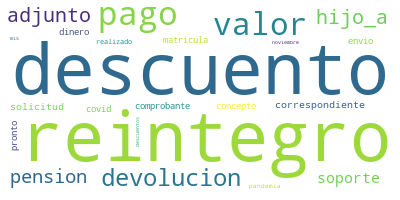

In [60]:
lista_mensajeuser=[]
for i in range(len(df_in)):
  lista_mensajeuser+=df_in[i]
long_string=''.join(lista_mensajeuser)
sal = pd.Series(long_string.split(' ')).value_counts()


sal2 = sal.reset_index()
sal2 = sal2.set_index('index')
saldic = sal2[0].to_dict()

#Creacion lista stop words
wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=1000, contour_width=50, contour_color='steelblue', margin=15, 
                      stopwords=[])
#Crear el word cloud
#wordcloud.generate(long_string)
wordcloud.generate_from_frequencies(saldic)
# wordcloud.generate(saldic)
#Visualizar el word cloud
wordcloud.to_file('personal_patrones.png')
wordcloud.to_image()

In [61]:
segmento = str.upper("{}".format(name))
# Iniciar el count vectorizer con stop words personalizado en español
count_vectorizer = CountVectorizer(stop_words=[])
# Ajustar y transformar los términos procesados
count_data = count_vectorizer.fit_transform(df_in)
#Visualizar los términos mas comunes
x , y= plot_10_most_common_words(count_data, count_vectorizer)

In [62]:
pd.Series(df_in.map(lambda x : x.split(' ')).sum()).value_counts().head(15).index

Index(['reintegro', 'descuento', 'pago', 'valor', 'adjunto', 'devolucion',
       'hijo_a', 'pension', 'solicitud', 'correspondiente', 'soporte',
       'dinero', 'comprobante', 'envio', 'matricula'],
      dtype='object')

In [63]:
df_in.tolist()

['acuerdo instrucciones contenidas presente adjunto archivo reintegro copia consignacion hecha itau cuenta reintegro mayor valor recibido hijo_a',
 'escalado mediante presente permito informarles he realizado devolucion dinero restante correspondiente anticipo consignado empresa matricula hijo_a determinaciones encuentra realizando estudios industrial realizo descuento motivo pandemia valor matricula semestre pesos consignado empresa anticipo fueron pesos valor consignado devolucion pesos adjunta copia comprobante dinero consignado',
 'solicitud cerca reconocimiento',
 'validar proceso devolucion anticipo',
 'estoy enviando comunicacion octubre envio recibo pago derivado cobro descuento mis hijos pesar pago recibo pension mes noviembre curso estan descontando derecha pesar rembolso ochocientos noventa nueve mil cuatrocientos cincuenta ocho mil pesos cifra mayor solicitudda comunicacion estoy solicitudndo forma comedida hagan efectivo rembolso devuelvan dinero descontado',
 'envio copia

In [64]:
dw = list(sent_to_words(df_in))

In [65]:
dw

[['acuerdo',
  'instrucciones',
  'contenidas',
  'presente',
  'adjunto',
  'archivo',
  'reintegro',
  'copia',
  'consignacion',
  'hecha',
  'itau',
  'cuenta',
  'reintegro',
  'mayor',
  'valor',
  'recibido',
  'hijo_a'],
 ['escalado',
  'mediante',
  'presente',
  'permito',
  'informarles',
  'he',
  'realizado',
  'devolucion',
  'dinero',
  'restante',
  'correspondiente',
  'anticipo',
  'consignado',
  'empresa',
  'matricula',
  'hijo_a',
  'determinaciones',
  'encuentra',
  'realizando',
  'estudios',
  'industrial',
  'realizo',
  'descuento',
  'motivo',
  'pandemia',
  'valor',
  'matricula',
  'semestre',
  'pesos',
  'consignado',
  'empresa',
  'anticipo',
  'fueron',
  'pesos',
  'valor',
  'consignado',
  'devolucion',
  'pesos',
  'adjunta',
  'copia',
  'comprobante',
  'dinero',
  'consignado'],
 ['solicitud', 'cerca', 'reconocimiento'],
 ['validar', 'proceso', 'devolucion', 'anticipo'],
 ['estoy',
  'enviando',
  'comunicacion',
  'octubre',
  'envio',
  're

In [66]:
len(dw)

361

In [67]:
# @title Creación del Corpus
%%time

nlp = spacy.load('es_core_news_md')

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in swseg] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(dw, min_count=5, threshold=100))
trigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(bigram[dw], threshold=100))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in lista_stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#Definicion de segmento a analizar

# data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
# texts = data_lemmatized

data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(data_words_bigrams)

# texts = data_lemmatized
texts = data_words_bigrams



corpus = [id2word.doc2bow(text) for text in texts]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



CPU times: user 19.6 s, sys: 785 ms, total: 20.3 s
Wall time: 20.4 s


In [68]:
# #@title Optimización del Modelo
# #Definicion del segmento persistente
# segmento = "Solucion"

# #Funcion de soporte
# def compute_coherence_values(corpus, dictionary, k, a, b):
    
#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10, 
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b,
#                                            per_word_topics=True)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
#     return coherence_model_lda.get_coherence()

# grid = {}
# grid['Validation_Set'] = {}

# #Rango de topicos
# min_topics = 2
# # max_topics = 11
# max_topics = 5
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# #Parametro Alpha
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# #Parametro Beta
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')

# #Conjuntos de validacion
# num_of_docs = len(corpus)
# corpus_sets = [corpus]

# corpus_title = ['100% Corpus']

# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# #Intensivo en tiempo (Promedio de tiempo: 2 Horas)

# if 1 == 1:
#     pbar = tqdm.tqdm(total=540)
    
#     for i in range(len(corpus_sets)):
#         for k in topics_range:
#             for a in alpha:
#                 for b in beta:
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
#                                                   k=k, a=a, b=b)

#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)
                    
#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv(segmento+'.csv', index=False)
#     pbar.close()

# #Persistencia de hiperparámetros
# model_results_tabc = pd.DataFrame(model_results)
# model_results_tabc.to_csv(segmento + '_model.csv')
# print("**", len(model_results_tabc), segmento, "\n")
# model_results_tabc.head()

# #Mejor Modelo
# model_results_tabc = pd.read_csv(segmento + '_model.csv')
# best_model = model_results_tabc[model_results_tabc.Coherence == model_results_tabc.Coherence.max()][:1]
# #display(best_model.head())

# #Hiperparámetros del mejor modelo
# Topics = int(best_model.Topics.item())
# Alpha = float(best_model.Alpha.item())
# Beta = float(best_model.Beta.item())

# print("HIPERPARÁMETROS DEL MODELO OPTIMIZADO:")
# print('\nNumero de Tópicos:', Topics)
# print('Parámetro Alfa:', Alpha)
# print('Parámetro Beta:', Beta)
# #esto estaba silenciado

In [69]:
#@title Modelo LDA Optimizado 
%%time
# se cambio la vesion de pylavis https://stackoverflow.com/questions/66123774/why-pyldavis-graph-does-not-display-topic-keywords-on-the-bar-chart
# import pyLDAvis.gensim
# %matplotlib inline
#Visualización del modelo
pyLDAvis.enable_notebook()
# pyLDAvis.enable_notebook(local=True)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.909999999999999,
                                           eta=0.61,                                        
                                           per_word_topics=True)

#Visualizacion de los tópicos generados en el modelo LDA
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Prerrequisitos minimos para la representacion grafica del modelado de topicos
d = id2word
c = corpus
lda = lda_model

#Parametros de visualizacion
data = pyLDAvis.gensim.prepare(lda, c, d)

#Persistencia de resultados de modelado de tópicos
pyLDAvis.save_html(data, 'vis_' +name + '.html')
print('\n\n')
#Visualizacion
display(data)


[(0,
  '0.029*"devolucion" + 0.029*"solicitud" + 0.029*"reintegro" + '
  '0.025*"adjunto" + 0.015*"correspondiente" + 0.014*"pago" + 0.014*"hijo_a" + '
  '0.013*"soporte" + 0.011*"consignacion" + 0.009*"informacion"'),
 (1,
  '0.009*"dinero" + 0.008*"pago" + 0.008*"hijo_a" + 0.007*"semestre" + '
  '0.007*"validar" + 0.007*"respuesta" + 0.007*"auxilio_alojamiento" + '
  '0.006*"solicitud" + 0.006*"fueron" + 0.006*"estoy"'),
 (2,
  '0.044*"descuento" + 0.032*"pension" + 0.031*"valor" + 0.029*"pago" + '
  '0.021*"reintegro" + 0.017*"adjunto" + 0.015*"matricula" + 0.014*"hijo_a" + '
  '0.014*"concepto" + 0.011*"comprobante"')]





PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.127918  0.048362       1        1  44.461968
0     -0.006936 -0.105547       2        1  34.756160
1     -0.120982  0.057185       3        1  20.781872, topic_info=          Term        Freq       Total Category  logprob  loglift
21   descuento  147.000000  147.000000  Default  30.0000  30.0000
78     pension  105.000000  105.000000  Default  29.0000  29.0000
46   solicitud   84.000000   84.000000  Default  28.0000  28.0000
15       valor  113.000000  113.000000  Default  27.0000  27.0000
33   matricula   50.000000   50.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
248  totalidad    5.163636    9.682410   Topic3  -5.6869   0.9424
17    anticipo    5.958858   20.391838   Topic3  -5.5436   0.3408
72   noviembre    5.829961   35.303627   Topic3  -5.5655  -0.2299
417       hizo    5.162037   10.284581   Topic3  -5.6872   0.8818
14   reintegro    5.569065  146.957627   Topic3  -5.6113  -1.7018

[188 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.463977  acuerdo
0         2  0.270654  acuerdo
0         3  0.270654  acuerdo
1         1  0.460521  adjunto
1         2  0.535879  adjunto
...     ...       ...      ...
48        3  0.914285  validar
15        1  0.908739    valor
15        2  0.070582    valor
15        3  0.026468    valor
367       1  0.972758  valores

[297 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

CPU times: user 1.78 s, sys: 120 ms, total: 1.9 s
Wall time: 3.83 s


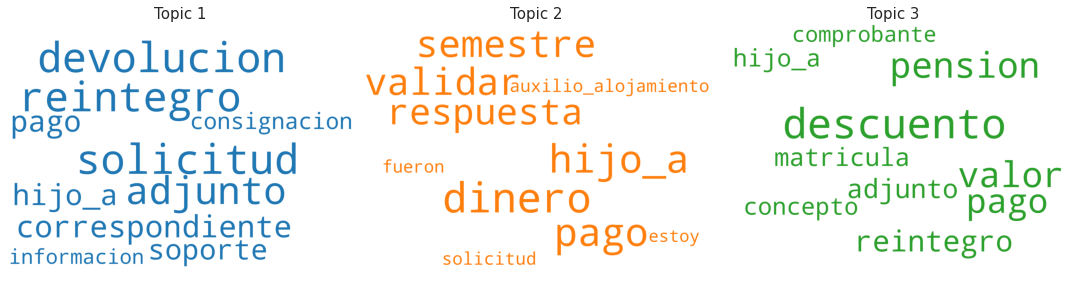

In [70]:
#@title Nubes de Palabras de los Términos clave N Principales en cada Tema
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=15))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.savefig("personal_{}_topics_{}_results.png".format(name,i+1),bbox_inches = 'tight')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [71]:
#@title Red Semántica

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#print(trigram_mod[bigram_mod[data_words[0]]])
# Funciones para bigrams, trigrams lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#Aplicacion de las respectivas funciones
#Formacion de bigramas
data_words_bigrams = make_bigrams(data_words)

#Creacion del diccionario
id2word = corpora.Dictionary(data_words_bigrams)

# Creacion del Corpus
texts = data_words_bigrams

#Frecuencia termino documento
corpus = [id2word.doc2bow(text) for text in texts]

#VEMOS CUANTOS TERMINOS ESTAN EN NUESTRO DICCIONARIO Y CUALES SON LOS MÁS FRECUENTE
word_freq = defaultdict(int)
for sent in data_words_bigrams:
    for i in sent:
        word_freq[i] += 10
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[50:100]

cores = multiprocessing.cpu_count()

##Entrenamiento del Modelo
w2v_model = Word2Vec(min_count=7, #SE CONSTRUYE EL VOCABULARIO A PARTIR DE LA FRECUENCIA DE APARICION QUE SE DEFINA AQUI
                     window=3,#SE AJUSTA EL NUMERO DE PALABRAS ATRAS Y ADELANTE DE LA PALABRA OBJETIVO PARA VECORIZARLA
                     size=30, #EL TAMANO DEL VECTOR DE CADA PALABRA
                     sample=1e-4, #-5 en principio #ESTE ES EL PARAMETRO QUE HAY QUE AJUSTAR, ES EL MAS SENSIBLE DEL MODELO
                     alpha=0.003, 
                     min_alpha=0.007, 
                     negative=10,
                     workers=cores-1)

#Construccion de vocabulario
w2v_model.build_vocab(data_words_bigrams, progress_per=10000)

#Entrenamiento del modelo
a=w2v_model.train(data_words_bigrams, total_examples=w2v_model.corpus_count, epochs=200, report_delay=1)

#Terminos similares
# w2v_model.wv.most_similar(positive=["contrasena"], topn=10)

##FUNCION PARA REDUCIR LA DIMENSION DEL ESPACIO DE PALABRAS Y PODER VISUALIZARLAS
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 30), dtype='f')
    word_labels = [word]
    color_list  = ["#25427B"] #a los colores de la campaña

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append("#33BBFF")
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append("#EBECED")
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    freq=[]
    for i in word_labels:
       freq.append(word_freq[i])

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list,'freq':freq})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': df['freq'],
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ('+ df["words"][line].title()+','+str(df['freq'][line])+')',
                 horizontalalignment='left',
                 verticalalignment='top', size='small',
                 #color=df['color'][line],
                 color='black',
                 weight='normal'
                ).set_size(11)
    
    plt.axis(emit=True)
    plt.xlim(Y[:, 0].min()-10, Y[:, 0].max()+10)
    plt.ylim(Y[:, 1].min()-10, Y[:, 1].max()+30)
    plt.title('Visualización semántica para {}'.format(word.title()))

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



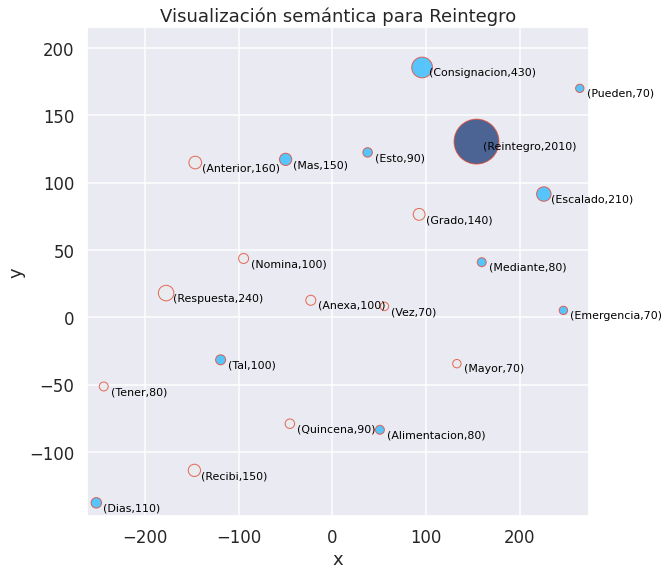

In [72]:
#@title
nombre = x[0]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')##

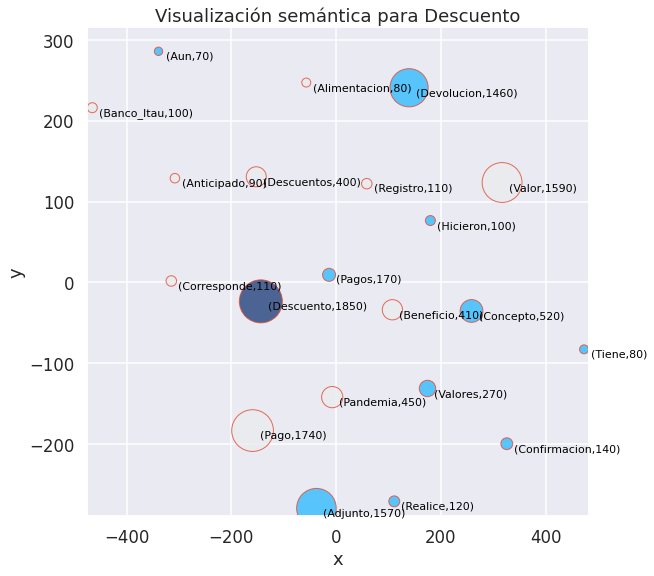

In [73]:
#@title


# tsnescatterplot(w2v_model, "activo", [t[0] for t in w2v_model.wv.most_similar(positive=["activo"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
#@title
nombre = x[1]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

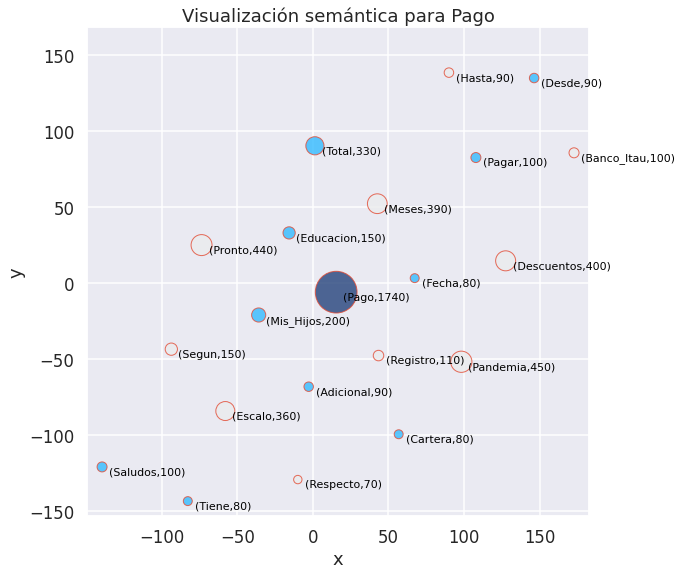

In [74]:
# @title 
#cuota se replaza por el temino clave que encontramos en las graficas de barras para 1-gramas
# tsnescatterplot(w2v_model, "confirmar", [t[0] for t in w2v_model.wv.most_similar(positive=["confirmar"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[2]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

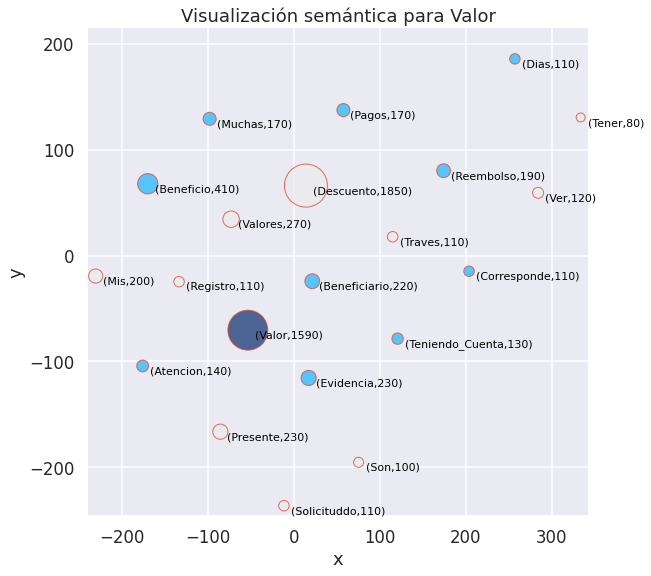

In [75]:
#@title
# tsnescatterplot(w2v_model, "actualizar", [t[0] for t in w2v_model.wv.most_similar(positive=["actualizar"], topn=20)][10:])
# plt.savefig("intereses_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
nombre = x[3]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

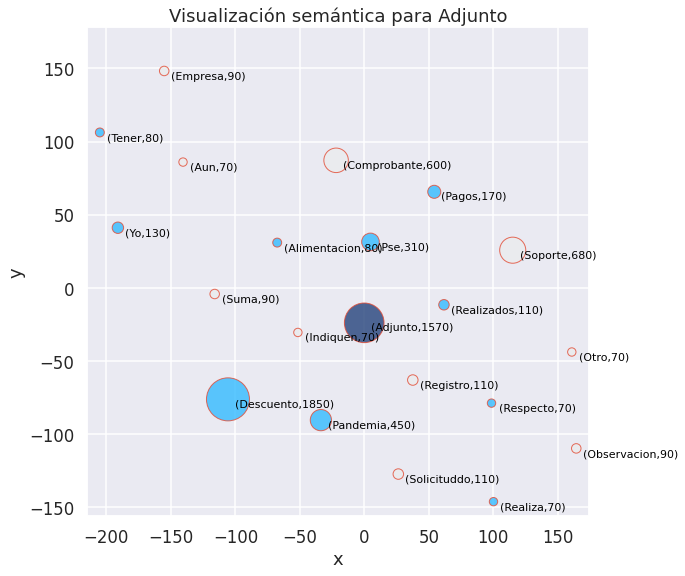

In [76]:
#@title
# tsnescatterplot(w2v_model, "codigo", [t[0] for t in w2v_model.wv.most_similar(positive=["codigo"], topn=20)][10:])
# plt.savefig("llegando_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[4]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

In [77]:
 word_vectors = w2v_model.wv
 word_vectors.save_word2vec_format('w2vecx_total_{}'.format(name))
 #Save model
from gensim.scripts.word2vec2tensor import word2vec2tensor 
word2vec2tensor('w2vecx_total_{}'.format(name), '{}_total_tensor00'.format(name))

In [78]:
#hacer version  con guines y sin guines que llos dijeron.

### Solucion

In [79]:
name = 'Solucion'

In [80]:
df_creacion =grupo['ObservacionCreacion'].copy()
df_solucion =grupo['ObservacionSolucion_+_n2'].copy()
df_in=df_solucion
df_in.iloc[0]

'informamos registro contable reintegro consignacion beneficiario reflejado mesada pensional mes diciembre acuerdo instrucciones contenidas presente adjunto archivo reintegro copia consignacion hecha itau cuenta reintegro mayor valor recibido hijo_a'

In [81]:
  for i in range(1,6):
    ng = i
    segmento = str.upper("({}_{}-gramas)".format(name,ng))
    # Iniciar el count vectorizer con stop words personalizado en español
    count_vectorizer = CountVectorizer(stop_words=[],ngram_range=(ng, ng))
    # Ajustar y transformar los términos procesados
    count_data = count_vectorizer.fit_transform(df_in)
    #Visualizar los términos mas comunes
    words,counts = plot_10_most_common_words(count_data, count_vectorizer)
    # buen dia , ecompetro com , com .co 
    print(words)

['reintegro', 'consignacion', 'valor', 'descuento', 'informamos', 'diciembre', 'pago', 'quincena', 'mes', 'solicitud', 'reflejado', 'registro', 'adjunto', 'contable', 'devolucion']


['registro contable', 'contable reintegro', 'informamos registro', 'reintegro consignacion', 'mes diciembre', 'quincena mes', 'segunda quincena', 'reflejado segunda', 'consignacion reflejado', 'consignacion beneficiario', 'beneficiario reflejado', 'primera quincena', 'pronto pago', 'reflejado primera', 'matricula pension']


['registro contable reintegro', 'contable reintegro consignacion', 'informamos registro contable', 'quincena mes diciembre', 'reflejado segunda quincena', 'segunda quincena mes', 'reintegro consignacion reflejado', 'reintegro consignacion beneficiario', 'consignacion beneficiario reflejado', 'consignacion reflejado segunda', 'primera quincena mes', 'reflejado primera quincena', 'beneficiario reflejado primera', 'acuerdo solicitud informamos', 'descuento pronto pago']


['informamos registro contable reintegro', 'registro contable reintegro consignacion', 'reflejado segunda quincena mes', 'contable reintegro consignacion reflejado', 'segunda quincena mes diciembre', 'contable reintegro consignacion beneficiario', 'reintegro consignacion beneficiario reflejado', 'consignacion reflejado segunda quincena', 'reintegro consignacion reflejado segunda', 'reflejado primera quincena mes', 'primera quincena mes diciembre', 'beneficiario reflejado primera quincena', 'consignacion beneficiario reflejado primera', 'beneficiario reflejado segunda quincena', 'consignacion beneficiario reflejado segunda']


['informamos registro contable reintegro consignacion', 'registro contable reintegro consignacion reflejado', 'reflejado segunda quincena mes diciembre', 'registro contable reintegro consignacion beneficiario', 'contable reintegro consignacion beneficiario reflejado', 'consignacion reflejado segunda quincena mes', 'contable reintegro consignacion reflejado segunda', 'reintegro consignacion reflejado segunda quincena', 'reflejado primera quincena mes diciembre', 'beneficiario reflejado primera quincena mes', 'consignacion beneficiario reflejado primera quincena', 'reintegro consignacion beneficiario reflejado primera', 'beneficiario reflejado segunda quincena mes', 'consignacion beneficiario reflejado segunda quincena', 'reintegro consignacion beneficiario reflejado segunda']


In [82]:
df_in.reset_index(inplace=True, drop=True)

In [83]:
df_in=df_in.apply(lambda x: x.strip())

In [84]:
df_in.head(3)

0    informamos registro contable reintegro consign...
1    atencion solicitud beneficiario informar encue...
2                   confirma recibo sello soporte pago
Name: ObservacionSolucion_+_n2, dtype: object

In [85]:
df_in[2]

'confirma recibo sello soporte pago'

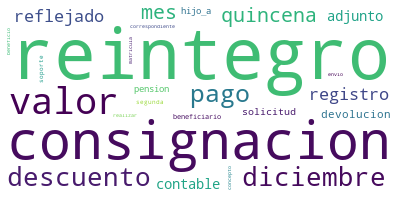

In [86]:
lista_mensajeuser=[]
for i in range(len(df_in)):
  lista_mensajeuser+=df_in[i]
long_string=''.join(lista_mensajeuser)
sal = pd.Series(long_string.split(' ')).value_counts()


sal2 = sal.reset_index()
sal2 = sal2.set_index('index')
saldic = sal2[0].to_dict()

#Creacion lista stop words
wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=1000, contour_width=50, contour_color='steelblue', margin=15, 
                      stopwords=[])
#Crear el word cloud
#wordcloud.generate(long_string)
wordcloud.generate_from_frequencies(saldic)
# wordcloud.generate(saldic)
#Visualizar el word cloud
wordcloud.to_file('personal_patrones.png')
wordcloud.to_image()

In [87]:
segmento = str.upper("{}".format(name))
# Iniciar el count vectorizer con stop words personalizado en español
count_vectorizer = CountVectorizer(stop_words=[])
# Ajustar y transformar los términos procesados
count_data = count_vectorizer.fit_transform(df_in)
#Visualizar los términos mas comunes
x , y= plot_10_most_common_words(count_data, count_vectorizer)

In [88]:
pd.Series(df_in.map(lambda x : x.split(' ')).sum()).value_counts().head(15).index

Index(['reintegro', 'consignacion', 'valor', 'descuento', 'informamos',
       'diciembre', 'pago', 'quincena', 'mes', 'solicitud', 'registro',
       'reflejado', 'adjunto', 'contable', 'devolucion'],
      dtype='object')

In [89]:
df_in.tolist()

['informamos registro contable reintegro consignacion beneficiario reflejado mesada pensional mes diciembre acuerdo instrucciones contenidas presente adjunto archivo reintegro copia consignacion hecha itau cuenta reintegro mayor valor recibido hijo_a',
 'atencion solicitud beneficiario informar encuentra proceso lel mes diciembre tiene ningun pago pendiente atencion solicitud beneficiario informar encuentra proceso lel mes diciembre tiene ningun pago pendiente',
 'confirma recibo sello soporte pago',
 'brinda informacion banco itau',
 'tramitado ticket',
 'informamos registro contable reintegro consignacion beneficiario reflejado mesada pensional mes diciembre envio copia pago devolucion anticipo servicio solucionado',
 'valida evidencia numero  informamos registro contable reintegro consignacion reflejado mesada pensional octubre',
 'informa respuesta cuenta banco itau',
 'informamos registro contable reintegro consignacion reflejado segunda quincena mes diciembre  adjunto comprobante

In [90]:
dw = list(sent_to_words(df_in))

In [91]:
dw

[['informamos',
  'registro',
  'contable',
  'reintegro',
  'consignacion',
  'beneficiario',
  'reflejado',
  'mesada',
  'pensional',
  'mes',
  'diciembre',
  'acuerdo',
  'instrucciones',
  'contenidas',
  'presente',
  'adjunto',
  'archivo',
  'reintegro',
  'copia',
  'consignacion',
  'hecha',
  'itau',
  'cuenta',
  'reintegro',
  'mayor',
  'valor',
  'recibido',
  'hijo_a'],
 ['atencion',
  'solicitud',
  'beneficiario',
  'informar',
  'encuentra',
  'proceso',
  'lel',
  'mes',
  'diciembre',
  'tiene',
  'ningun',
  'pago',
  'pendiente',
  'atencion',
  'solicitud',
  'beneficiario',
  'informar',
  'encuentra',
  'proceso',
  'lel',
  'mes',
  'diciembre',
  'tiene',
  'ningun',
  'pago',
  'pendiente'],
 ['confirma', 'recibo', 'sello', 'soporte', 'pago'],
 ['brinda', 'informacion', 'banco', 'itau'],
 ['tramitado', 'ticket'],
 ['informamos',
  'registro',
  'contable',
  'reintegro',
  'consignacion',
  'beneficiario',
  'reflejado',
  'mesada',
  'pensional',
  'mes',

In [92]:
len(dw)

361

In [93]:
# @title Creación del Corpus
%%time

nlp = spacy.load('es_core_news_md')

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in swseg] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(dw, min_count=5, threshold=100))
trigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(bigram[dw], threshold=100))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in lista_stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#Definicion de segmento a analizar

# data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
# texts = data_lemmatized

data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(data_words_bigrams)

# texts = data_lemmatized
texts = data_words_bigrams



corpus = [id2word.doc2bow(text) for text in texts]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



CPU times: user 21.9 s, sys: 992 ms, total: 22.9 s
Wall time: 23.1 s


In [94]:
# #@title Optimización del Modelo
# #Definicion del segmento persistente
# segmento = "Solucion"

# #Funcion de soporte
# def compute_coherence_values(corpus, dictionary, k, a, b):
    
#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10, 
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b,
#                                            per_word_topics=True)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
#     return coherence_model_lda.get_coherence()

# grid = {}
# grid['Validation_Set'] = {}

# #Rango de topicos
# min_topics = 2
# # max_topics = 11
# max_topics = 5
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# #Parametro Alpha
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# #Parametro Beta
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')

# #Conjuntos de validacion
# num_of_docs = len(corpus)
# corpus_sets = [corpus]

# corpus_title = ['100% Corpus']

# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# #Intensivo en tiempo (Promedio de tiempo: 2 Horas)

# if 1 == 1:
#     pbar = tqdm.tqdm(total=540)
    
#     for i in range(len(corpus_sets)):
#         for k in topics_range:
#             for a in alpha:
#                 for b in beta:
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
#                                                   k=k, a=a, b=b)

#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)
                    
#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv(segmento+'.csv', index=False)
#     pbar.close()

# #Persistencia de hiperparámetros
# model_results_tabc = pd.DataFrame(model_results)
# model_results_tabc.to_csv(segmento + '_model.csv')
# print("**", len(model_results_tabc), segmento, "\n")
# model_results_tabc.head()

# #Mejor Modelo
# model_results_tabc = pd.read_csv(segmento + '_model.csv')
# best_model = model_results_tabc[model_results_tabc.Coherence == model_results_tabc.Coherence.max()][:1]
# #display(best_model.head())

# #Hiperparámetros del mejor modelo
# Topics = int(best_model.Topics.item())
# Alpha = float(best_model.Alpha.item())
# Beta = float(best_model.Beta.item())

# print("HIPERPARÁMETROS DEL MODELO OPTIMIZADO:")
# print('\nNumero de Tópicos:', Topics)
# print('Parámetro Alfa:', Alpha)
# print('Parámetro Beta:', Beta)
# #esto estaba silenciado

In [95]:
#@title Modelo LDA Optimizado 
%%time
# se cambio la vesion de pylavis https://stackoverflow.com/questions/66123774/why-pyldavis-graph-does-not-display-topic-keywords-on-the-bar-chart
# import pyLDAvis.gensim
# %matplotlib inline
#Visualización del modelo
pyLDAvis.enable_notebook()
# pyLDAvis.enable_notebook(local=True)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.909999999999999,
                                           eta=0.61,                                        
                                           per_word_topics=True)

#Visualizacion de los tópicos generados en el modelo LDA
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Prerrequisitos minimos para la representacion grafica del modelado de topicos
d = id2word
c = corpus
lda = lda_model

#Parametros de visualizacion
data = pyLDAvis.gensim.prepare(lda, c, d)

#Persistencia de resultados de modelado de tópicos
pyLDAvis.save_html(data, 'vis_' +name + '.html')
print('\n\n')
#Visualizacion
display(data)

# APrece covid


[(0,
  '0.010*"descuento" + 0.008*"beneficio" + 0.008*"acuerdo" + 0.008*"valor" + '
  '0.008*"covid" + 0.008*"pago" + 0.007*"realizar" + 0.007*"matricula" + '
  '0.007*"descuentos" + 0.006*"comunicado"'),
 (1,
  '0.045*"reintegro" + 0.027*"consignacion" + 0.024*"diciembre" + '
  '0.023*"quincena" + 0.023*"descuento" + 0.022*"informamos" + 0.022*"valor" + '
  '0.022*"mes" + 0.022*"reflejado" + 0.021*"adjunto"'),
 (2,
  '0.029*"solicitud" + 0.012*"reintegro" + 0.011*"informacion" + '
  '0.010*"cuenta" + 0.010*"fecha" + 0.010*"realizar" + 0.009*"respuesta" + '
  '0.009*"proceso" + 0.008*"atencion" + 0.008*"tramite"')]





PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.165904  0.031177       1        1  55.646759
0      0.040682 -0.107363       2        1  22.959124
2      0.125222  0.076186       3        1  21.394117, topic_info=             Term        Freq       Total Category  logprob  loglift
4    consignacion  163.000000  163.000000  Default  30.0000  30.0000
9       diciembre  143.000000  143.000000  Default  29.0000  29.0000
64       quincena  138.000000  138.000000  Default  28.0000  28.0000
32      solicitud  128.000000  128.000000  Default  27.0000  27.0000
20      reflejado  130.000000  130.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
44     devolucion   15.096379  121.197023   Topic3  -5.0204  -0.5409
45          envio   11.394562   46.871691   Topic3  -5.3017   0.1278
0         acuerdo   11.471205   54.065027   Topic3  -5.2950  -0.0083
29           pago   14.378217  146.548996   Topic3  -5.0691  -0.7796
294         hacer    8.966502   20.267729   Topic3  -5.5413   0.7265

[183 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
513       1  0.097410       actual
513       2  0.876694       actual
0         1  0.425414      acuerdo
0         2  0.369925      acuerdo
0         3  0.203459      acuerdo
...     ...       ...          ...
23        3  0.031557        valor
73        3  0.781172  vencimiento
747       1  0.213719      virtual
747       2  0.712397      virtual
747       3  0.071240      virtual

[318 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

CPU times: user 1.79 s, sys: 43.9 ms, total: 1.84 s
Wall time: 2.14 s


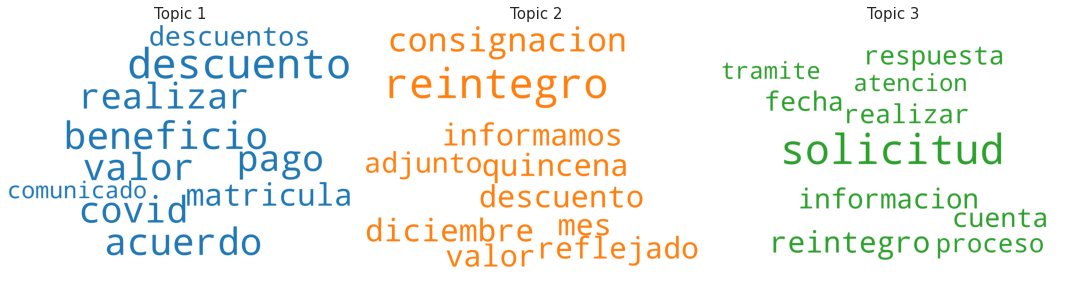

In [96]:
#@title Nubes de Palabras de los Términos clave N Principales en cada Tema
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=15))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.savefig("personal_{}_topics_{}_results.png".format(name,i+1),bbox_inches = 'tight')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [97]:
#@title Red Semántica

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#print(trigram_mod[bigram_mod[data_words[0]]])
# Funciones para bigrams, trigrams lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#Aplicacion de las respectivas funciones
#Formacion de bigramas
data_words_bigrams = make_bigrams(data_words)

#Creacion del diccionario
id2word = corpora.Dictionary(data_words_bigrams)

# Creacion del Corpus
texts = data_words_bigrams

#Frecuencia termino documento
corpus = [id2word.doc2bow(text) for text in texts]

#VEMOS CUANTOS TERMINOS ESTAN EN NUESTRO DICCIONARIO Y CUALES SON LOS MÁS FRECUENTE
word_freq = defaultdict(int)
for sent in data_words_bigrams:
    for i in sent:
        word_freq[i] += 10
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[50:100]

cores = multiprocessing.cpu_count()

##Entrenamiento del Modelo
w2v_model = Word2Vec(min_count=7, #SE CONSTRUYE EL VOCABULARIO A PARTIR DE LA FRECUENCIA DE APARICION QUE SE DEFINA AQUI
                     window=3,#SE AJUSTA EL NUMERO DE PALABRAS ATRAS Y ADELANTE DE LA PALABRA OBJETIVO PARA VECORIZARLA
                     size=30, #EL TAMANO DEL VECTOR DE CADA PALABRA
                     sample=1e-4, #-5 en principio #ESTE ES EL PARAMETRO QUE HAY QUE AJUSTAR, ES EL MAS SENSIBLE DEL MODELO
                     alpha=0.003, 
                     min_alpha=0.007, 
                     negative=10,
                     workers=cores-1)

#Construccion de vocabulario
w2v_model.build_vocab(data_words_bigrams, progress_per=10000)

#Entrenamiento del modelo
a=w2v_model.train(data_words_bigrams, total_examples=w2v_model.corpus_count, epochs=200, report_delay=1)

#Terminos similares
# w2v_model.wv.most_similar(positive=["contrasena"], topn=10)

##FUNCION PARA REDUCIR LA DIMENSION DEL ESPACIO DE PALABRAS Y PODER VISUALIZARLAS
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 30), dtype='f')
    word_labels = [word]
    color_list  = ["#25427B"] #a los colores de la campaña

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append("#33BBFF")
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append("#EBECED")
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    freq=[]
    for i in word_labels:
       freq.append(word_freq[i])

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list,'freq':freq})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': df['freq'],
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ('+ df["words"][line].title()+','+str(df['freq'][line])+')',
                 horizontalalignment='left',
                 verticalalignment='top', size='small',
                 #color=df['color'][line],
                 color='black',
                 weight='normal'
                ).set_size(11)
    
    plt.axis(emit=True)
    plt.xlim(Y[:, 0].min()-10, Y[:, 0].max()+10)
    plt.ylim(Y[:, 1].min()-10, Y[:, 1].max()+30)
    plt.title('Visualización semántica para {}'.format(word.title()))

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



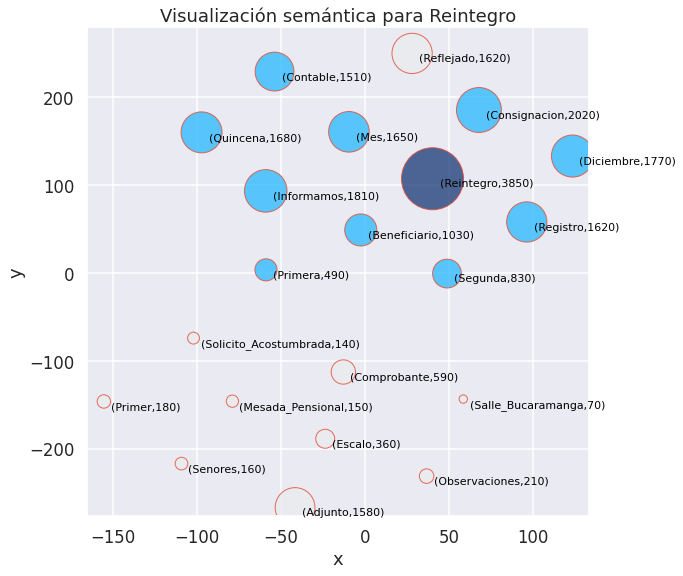

In [98]:
#@title
nombre = x[0]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')##

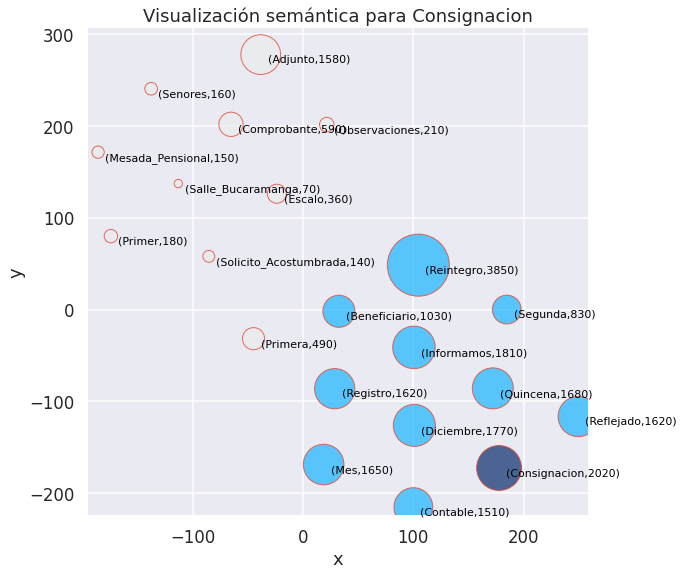

In [99]:
#@title


# tsnescatterplot(w2v_model, "activo", [t[0] for t in w2v_model.wv.most_similar(positive=["activo"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
#@title
nombre = x[1]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

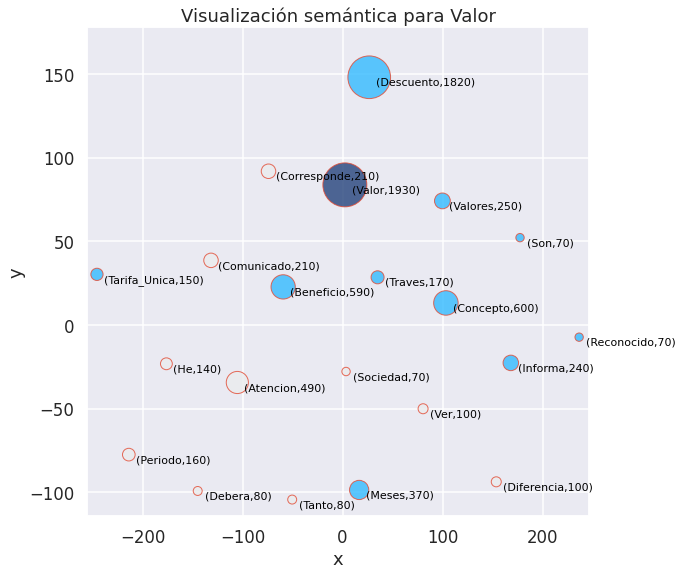

In [100]:
# @title 
#cuota se replaza por el temino clave que encontramos en las graficas de barras para 1-gramas
# tsnescatterplot(w2v_model, "confirmar", [t[0] for t in w2v_model.wv.most_similar(positive=["confirmar"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[2]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

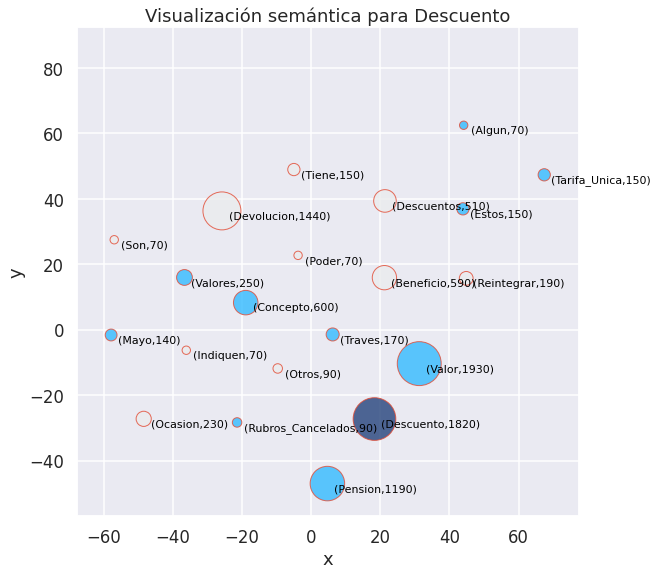

In [101]:
#@title
# tsnescatterplot(w2v_model, "actualizar", [t[0] for t in w2v_model.wv.most_similar(positive=["actualizar"], topn=20)][10:])
# plt.savefig("intereses_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
nombre = x[3]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

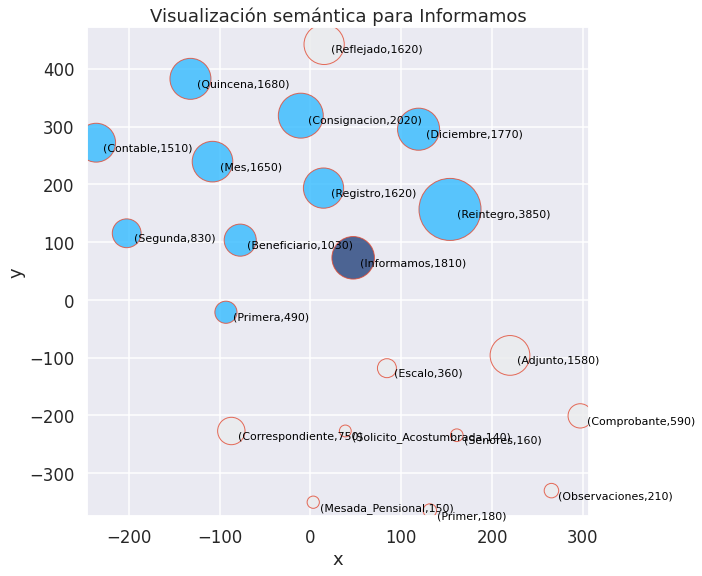

In [102]:
#@title
# tsnescatterplot(w2v_model, "codigo", [t[0] for t in w2v_model.wv.most_similar(positive=["codigo"], topn=20)][10:])
# plt.savefig("llegando_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[4]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

In [103]:
 word_vectors = w2v_model.wv
 word_vectors.save_word2vec_format('w2vecx_total_{}'.format(name))
 #Save model
from gensim.scripts.word2vec2tensor import word2vec2tensor 
word2vec2tensor('w2vecx_total_{}'.format(name), '{}_total_tensor00'.format(name))

In [104]:
#hacer version  con guines y sin guines que llos dijeron.

### Total

In [105]:
name = 'Total'

In [106]:
df_creacion =grupo['ObservacionCreacion'].copy()
df_solucion =grupo['ObservacionSolucion_+_n2'].copy()
df_in=df_creacion+ ' '+ df_solucion
df_in.iloc[0]

'acuerdo instrucciones contenidas presente adjunto archivo reintegro copia consignacion hecha itau cuenta reintegro mayor valor recibido hijo_a informamos registro contable reintegro consignacion beneficiario reflejado mesada pensional mes diciembre acuerdo instrucciones contenidas presente adjunto archivo reintegro copia consignacion hecha itau cuenta reintegro mayor valor recibido hijo_a'

In [107]:
  for i in range(1,6):
    ng = i
    segmento = str.upper("({}_{}-gramas)".format(name,ng))
    # Iniciar el count vectorizer con stop words personalizado en español
    count_vectorizer = CountVectorizer(stop_words=[],ngram_range=(ng, ng))
    # Ajustar y transformar los términos procesados
    count_data = count_vectorizer.fit_transform(df_in)
    #Visualizar los términos mas comunes
    words,counts = plot_10_most_common_words(count_data, count_vectorizer)
    # buen dia , ecompetro com , com .co 
    print(words)

['reintegro', 'descuento', 'valor', 'pago', 'adjunto', 'devolucion', 'solicitud', 'consignacion', 'hijo_a', 'pension', 'mes', 'diciembre', 'informamos', 'quincena', 'registro']


['registro contable', 'contable reintegro', 'informamos registro', 'reintegro consignacion', 'mes diciembre', 'quincena mes', 'pronto pago', 'segunda quincena', 'reflejado segunda', 'consignacion reflejado', 'consignacion beneficiario', 'escalo correspondiente', 'adjunto comprobante', 'matricula pension', 'beneficiario reflejado']


['registro contable reintegro', 'contable reintegro consignacion', 'informamos registro contable', 'quincena mes diciembre', 'reflejado segunda quincena', 'segunda quincena mes', 'reintegro consignacion reflejado', 'reintegro consignacion beneficiario', 'consignacion beneficiario reflejado', 'consignacion reflejado segunda', 'descuento pronto pago', 'primera quincena mes', 'reflejado primera quincena', 'solicito acostumbrada solicitud', 'adjunto comprobante pago']


['informamos registro contable reintegro', 'registro contable reintegro consignacion', 'reflejado segunda quincena mes', 'contable reintegro consignacion reflejado', 'segunda quincena mes diciembre', 'contable reintegro consignacion beneficiario', 'reintegro consignacion beneficiario reflejado', 'consignacion reflejado segunda quincena', 'reintegro consignacion reflejado segunda', 'reflejado primera quincena mes', 'primera quincena mes diciembre', 'beneficiario reflejado primera quincena', 'consignacion beneficiario reflejado primera', 'beneficiario reflejado segunda quincena', 'consignacion beneficiario reflejado segunda']


['informamos registro contable reintegro consignacion', 'registro contable reintegro consignacion reflejado', 'reflejado segunda quincena mes diciembre', 'registro contable reintegro consignacion beneficiario', 'contable reintegro consignacion beneficiario reflejado', 'consignacion reflejado segunda quincena mes', 'contable reintegro consignacion reflejado segunda', 'reintegro consignacion reflejado segunda quincena', 'reflejado primera quincena mes diciembre', 'beneficiario reflejado primera quincena mes', 'consignacion beneficiario reflejado primera quincena', 'reintegro consignacion beneficiario reflejado primera', 'beneficiario reflejado segunda quincena mes', 'consignacion beneficiario reflejado segunda quincena', 'reintegro consignacion beneficiario reflejado segunda']


In [108]:
df_in.reset_index(inplace=True, drop=True)

In [109]:
df_in=df_in.apply(lambda x: x.strip())

In [110]:
df_in.head(3)

0    acuerdo instrucciones contenidas presente adju...
1    escalado mediante presente permito informarles...
2    solicitud cerca reconocimiento confirma recibo...
dtype: object

In [111]:
df_in[2]

'solicitud cerca reconocimiento confirma recibo sello soporte pago'

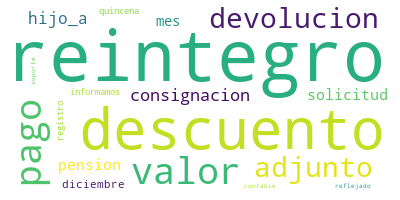

In [112]:
lista_mensajeuser=[]
for i in range(len(df_in)):
  lista_mensajeuser+=df_in[i]
long_string=''.join(lista_mensajeuser)
sal = pd.Series(long_string.split(' ')).value_counts()


sal2 = sal.reset_index()
sal2 = sal2.set_index('index')
saldic = sal2[0].to_dict()

#Creacion lista stop words
wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=1000, contour_width=50, contour_color='steelblue', margin=15, 
                      stopwords=[])
#Crear el word cloud
#wordcloud.generate(long_string)
wordcloud.generate_from_frequencies(saldic)
# wordcloud.generate(saldic)
#Visualizar el word cloud
wordcloud.to_file('personal_patrones.png')
wordcloud.to_image()

In [113]:
segmento = str.upper("{}".format(name))
# Iniciar el count vectorizer con stop words personalizado en español
count_vectorizer = CountVectorizer(stop_words=[])
# Ajustar y transformar los términos procesados
count_data = count_vectorizer.fit_transform(df_in)
#Visualizar los términos mas comunes
x , y= plot_10_most_common_words(count_data, count_vectorizer)

In [114]:
pd.Series(df_in.map(lambda x : x.split(' ')).sum()).value_counts().head(15).index

Index(['reintegro', 'descuento', 'valor', 'pago', 'adjunto', 'devolucion',
       'solicitud', 'consignacion', 'hijo_a', 'pension', 'mes', 'diciembre',
       'informamos', 'quincena', 'registro'],
      dtype='object')

In [115]:
df_in.tolist()

['acuerdo instrucciones contenidas presente adjunto archivo reintegro copia consignacion hecha itau cuenta reintegro mayor valor recibido hijo_a informamos registro contable reintegro consignacion beneficiario reflejado mesada pensional mes diciembre acuerdo instrucciones contenidas presente adjunto archivo reintegro copia consignacion hecha itau cuenta reintegro mayor valor recibido hijo_a',
 'escalado mediante presente permito informarles he realizado devolucion dinero restante correspondiente anticipo consignado empresa matricula hijo_a determinaciones encuentra realizando estudios industrial realizo descuento motivo pandemia valor matricula semestre pesos consignado empresa anticipo fueron pesos valor consignado devolucion pesos adjunta copia comprobante dinero consignado atencion solicitud beneficiario informar encuentra proceso lel mes diciembre tiene ningun pago pendiente atencion solicitud beneficiario informar encuentra proceso lel mes diciembre tiene ningun pago pendiente',
 

In [116]:
dw = list(sent_to_words(df_in))

In [117]:
dw

[['acuerdo',
  'instrucciones',
  'contenidas',
  'presente',
  'adjunto',
  'archivo',
  'reintegro',
  'copia',
  'consignacion',
  'hecha',
  'itau',
  'cuenta',
  'reintegro',
  'mayor',
  'valor',
  'recibido',
  'hijo_a',
  'informamos',
  'registro',
  'contable',
  'reintegro',
  'consignacion',
  'beneficiario',
  'reflejado',
  'mesada',
  'pensional',
  'mes',
  'diciembre',
  'acuerdo',
  'instrucciones',
  'contenidas',
  'presente',
  'adjunto',
  'archivo',
  'reintegro',
  'copia',
  'consignacion',
  'hecha',
  'itau',
  'cuenta',
  'reintegro',
  'mayor',
  'valor',
  'recibido',
  'hijo_a'],
 ['escalado',
  'mediante',
  'presente',
  'permito',
  'informarles',
  'he',
  'realizado',
  'devolucion',
  'dinero',
  'restante',
  'correspondiente',
  'anticipo',
  'consignado',
  'empresa',
  'matricula',
  'hijo_a',
  'determinaciones',
  'encuentra',
  'realizando',
  'estudios',
  'industrial',
  'realizo',
  'descuento',
  'motivo',
  'pandemia',
  'valor',
  'matr

In [118]:
len(dw)

361

In [119]:
# @title Creación del Corpus
%%time

nlp = spacy.load('es_core_news_md')

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in swseg] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(dw, min_count=5, threshold=100))
trigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(bigram[dw], threshold=100))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in lista_stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#Definicion de segmento a analizar

# data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
# texts = data_lemmatized

data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(data_words_bigrams)

# texts = data_lemmatized
texts = data_words_bigrams



corpus = [id2word.doc2bow(text) for text in texts]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



CPU times: user 21.7 s, sys: 1.06 s, total: 22.8 s
Wall time: 22.8 s


In [120]:
# #@title Optimización del Modelo
# #Definicion del segmento persistente
# segmento = "Solucion"

# #Funcion de soporte
# def compute_coherence_values(corpus, dictionary, k, a, b):
    
#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10, 
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b,
#                                            per_word_topics=True)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
#     return coherence_model_lda.get_coherence()

# grid = {}
# grid['Validation_Set'] = {}

# #Rango de topicos
# min_topics = 2
# # max_topics = 11
# max_topics = 5
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# #Parametro Alpha
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# #Parametro Beta
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')

# #Conjuntos de validacion
# num_of_docs = len(corpus)
# corpus_sets = [corpus]

# corpus_title = ['100% Corpus']

# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# #Intensivo en tiempo (Promedio de tiempo: 2 Horas)

# if 1 == 1:
#     pbar = tqdm.tqdm(total=540)
    
#     for i in range(len(corpus_sets)):
#         for k in topics_range:
#             for a in alpha:
#                 for b in beta:
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
#                                                   k=k, a=a, b=b)

#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)
                    
#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv(segmento+'.csv', index=False)
#     pbar.close()

# #Persistencia de hiperparámetros
# model_results_tabc = pd.DataFrame(model_results)
# model_results_tabc.to_csv(segmento + '_model.csv')
# print("**", len(model_results_tabc), segmento, "\n")
# model_results_tabc.head()

# #Mejor Modelo
# model_results_tabc = pd.read_csv(segmento + '_model.csv')
# best_model = model_results_tabc[model_results_tabc.Coherence == model_results_tabc.Coherence.max()][:1]
# #display(best_model.head())

# #Hiperparámetros del mejor modelo
# Topics = int(best_model.Topics.item())
# Alpha = float(best_model.Alpha.item())
# Beta = float(best_model.Beta.item())

# print("HIPERPARÁMETROS DEL MODELO OPTIMIZADO:")
# print('\nNumero de Tópicos:', Topics)
# print('Parámetro Alfa:', Alpha)
# print('Parámetro Beta:', Beta)
# #esto estaba silenciado

In [121]:
#@title Modelo LDA Optimizado 
%%time
# se cambio la vesion de pylavis https://stackoverflow.com/questions/66123774/why-pyldavis-graph-does-not-display-topic-keywords-on-the-bar-chart
# import pyLDAvis.gensim
# %matplotlib inline
#Visualización del modelo
pyLDAvis.enable_notebook()
# pyLDAvis.enable_notebook(local=True)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.909999999999999,
                                           eta=0.61,                                        
                                           per_word_topics=True)

#Visualizacion de los tópicos generados en el modelo LDA
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Prerrequisitos minimos para la representacion grafica del modelado de topicos
d = id2word
c = corpus
lda = lda_model

#Parametros de visualizacion
data = pyLDAvis.gensim.prepare(lda, c, d)

#Persistencia de resultados de modelado de tópicos
pyLDAvis.save_html(data, 'vis_' +name + '.html')
print('\n\n')
#Visualizacion
display(data)


[(0,
  '0.028*"solicitud" + 0.018*"pension" + 0.017*"valor" + 0.016*"devolucion" + '
  '0.015*"adjunto" + 0.014*"meses" + 0.011*"descuento" + 0.011*"reintegro" + '
  '0.009*"hijo_a" + 0.008*"pago"'),
 (1,
  '0.048*"reintegro" + 0.028*"pago" + 0.026*"descuento" + 0.026*"adjunto" + '
  '0.022*"consignacion" + 0.020*"valor" + 0.019*"devolucion" + 0.017*"mes" + '
  '0.016*"quincena" + 0.016*"diciembre"'),
 (2,
  '0.016*"descuento" + 0.013*"matricula" + 0.013*"reintegro" + 0.012*"pension" '
  '+ 0.012*"pago" + 0.011*"valor" + 0.010*"realizar" + 0.010*"solicitud" + '
  '0.009*"informacion" + 0.009*"beneficio"')]





PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.123614 -0.064485       1        1  43.867766
2     -0.137230 -0.047023       2        1  31.643557
0      0.013616  0.111508       3        1  24.488677, topic_info=                Term        Freq       Total Category  logprob  loglift
1            adjunto  268.000000  268.000000  Default  30.0000  30.0000
59         solicitud  231.000000  231.000000  Default  29.0000  29.0000
157            meses   64.000000   64.000000  Default  28.0000  28.0000
4       consignacion  200.000000  200.000000  Default  27.0000  27.0000
5           contable  127.000000  127.000000  Default  26.0000  26.0000
..               ...         ...         ...      ...      ...      ...
9          diciembre   26.000742  151.693291   Topic3  -5.1296  -0.3568
29   correspondiente   23.379548  123.582411   Topic3  -5.2359  -0.2581
4       consignacion   22.321597  200.668349   Topic3  -5.2822  -0.7891
124         quincena   19.527069  149.080739   Topic3  -5.4159  -0.6257
12        informamos   18.959714  149.870787   Topic3  -5.4454  -0.6605

[199 rows x 6 columns], token_table=      Topic      Freq                 Term
term                                      
1327      1  0.060907  actual_contingencia
1327      2  0.060907  actual_contingencia
1327      3  0.913610  actual_contingencia
0         1  0.420180              acuerdo
0         2  0.408823              acuerdo
...     ...       ...                  ...
982       2  0.926428    use_adecuadamente
982       3  0.071264    use_adecuadamente
23        1  0.532971                valor
23        2  0.212514                valor
23        3  0.256366                valor

[401 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

CPU times: user 2.26 s, sys: 50.5 ms, total: 2.31 s
Wall time: 2.62 s


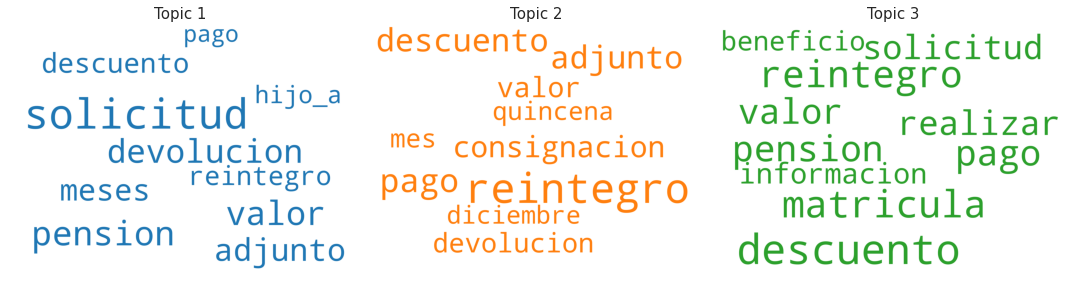

In [122]:
#@title Nubes de Palabras de los Términos clave N Principales en cada Tema
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=15))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.savefig("personal_{}_topics_{}_results.png".format(name,i+1),bbox_inches = 'tight')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [123]:
#@title Red Semántica

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#print(trigram_mod[bigram_mod[data_words[0]]])
# Funciones para bigrams, trigrams lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#Aplicacion de las respectivas funciones
#Formacion de bigramas
data_words_bigrams = make_bigrams(data_words)

#Creacion del diccionario
id2word = corpora.Dictionary(data_words_bigrams)

# Creacion del Corpus
texts = data_words_bigrams

#Frecuencia termino documento
corpus = [id2word.doc2bow(text) for text in texts]

#VEMOS CUANTOS TERMINOS ESTAN EN NUESTRO DICCIONARIO Y CUALES SON LOS MÁS FRECUENTE
word_freq = defaultdict(int)
for sent in data_words_bigrams:
    for i in sent:
        word_freq[i] += 10
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[50:100]

cores = multiprocessing.cpu_count()

##Entrenamiento del Modelo
w2v_model = Word2Vec(min_count=7, #SE CONSTRUYE EL VOCABULARIO A PARTIR DE LA FRECUENCIA DE APARICION QUE SE DEFINA AQUI
                     window=3,#SE AJUSTA EL NUMERO DE PALABRAS ATRAS Y ADELANTE DE LA PALABRA OBJETIVO PARA VECORIZARLA
                     size=30, #EL TAMANO DEL VECTOR DE CADA PALABRA
                     sample=1e-4, #-5 en principio #ESTE ES EL PARAMETRO QUE HAY QUE AJUSTAR, ES EL MAS SENSIBLE DEL MODELO
                     alpha=0.003, 
                     min_alpha=0.007, 
                     negative=10,
                     workers=cores-1)

#Construccion de vocabulario
w2v_model.build_vocab(data_words_bigrams, progress_per=10000)

#Entrenamiento del modelo
a=w2v_model.train(data_words_bigrams, total_examples=w2v_model.corpus_count, epochs=200, report_delay=1)

#Terminos similares
# w2v_model.wv.most_similar(positive=["contrasena"], topn=10)

##FUNCION PARA REDUCIR LA DIMENSION DEL ESPACIO DE PALABRAS Y PODER VISUALIZARLAS
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 30), dtype='f')
    word_labels = [word]
    color_list  = ["#25427B"] #a los colores de la campaña

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append("#33BBFF")
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append("#EBECED")
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    freq=[]
    for i in word_labels:
       freq.append(word_freq[i])

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list,'freq':freq})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': df['freq'],
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ('+ df["words"][line].title()+','+str(df['freq'][line])+')',
                 horizontalalignment='left',
                 verticalalignment='top', size='small',
                 #color=df['color'][line],
                 color='black',
                 weight='normal'
                ).set_size(11)
    
    plt.axis(emit=True)
    plt.xlim(Y[:, 0].min()-10, Y[:, 0].max()+10)
    plt.ylim(Y[:, 1].min()-10, Y[:, 1].max()+30)
    plt.title('Visualización semántica para {}'.format(word.title()))

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



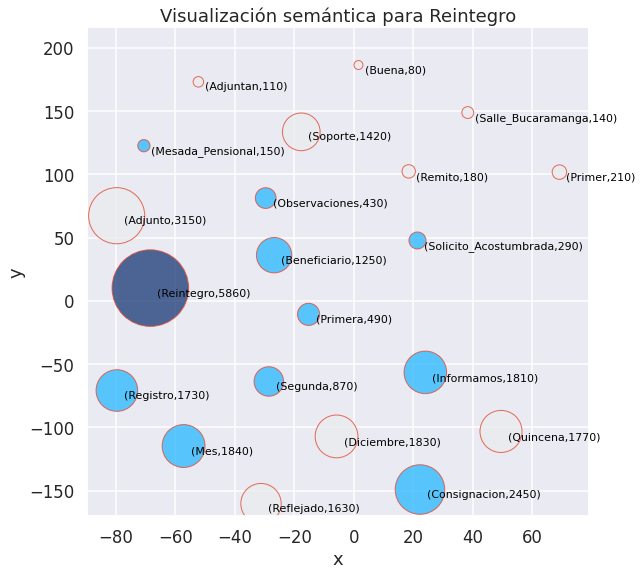

In [124]:
#@title
nombre = x[0]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')##

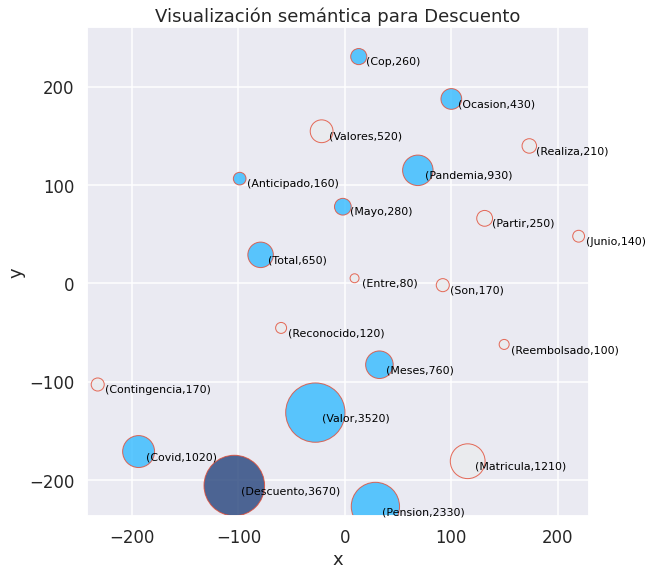

In [125]:
#@title


# tsnescatterplot(w2v_model, "activo", [t[0] for t in w2v_model.wv.most_similar(positive=["activo"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
#@title
nombre = x[1]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

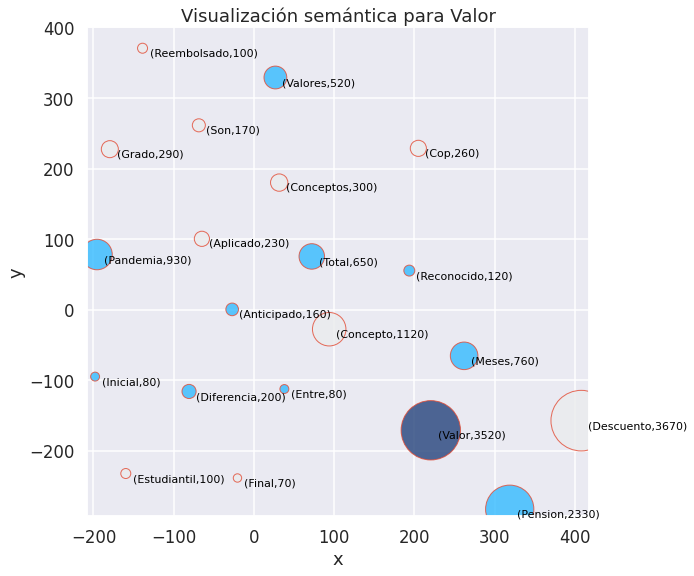

In [126]:
# @title 
#cuota se replaza por el temino clave que encontramos en las graficas de barras para 1-gramas
# tsnescatterplot(w2v_model, "confirmar", [t[0] for t in w2v_model.wv.most_similar(positive=["confirmar"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[2]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

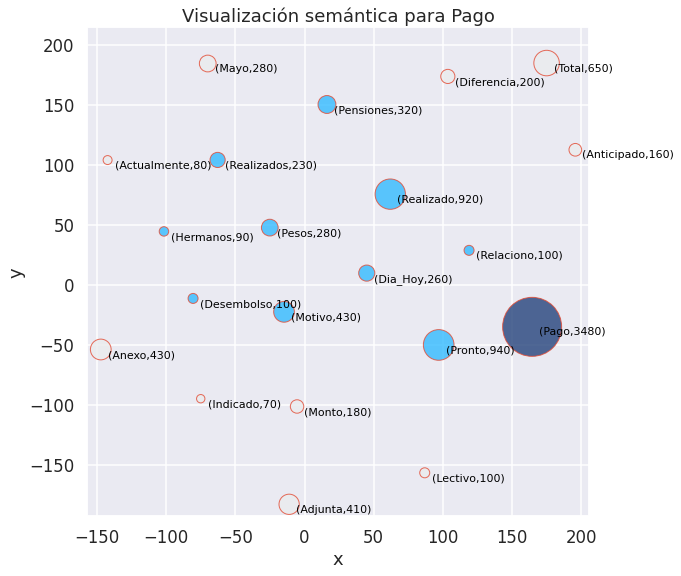

In [127]:
#@title
# tsnescatterplot(w2v_model, "actualizar", [t[0] for t in w2v_model.wv.most_similar(positive=["actualizar"], topn=20)][10:])
# plt.savefig("intereses_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
nombre = x[3]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

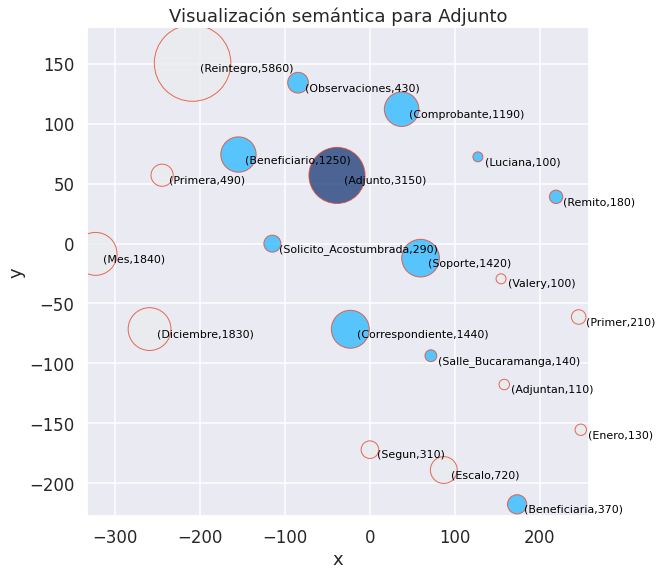

In [128]:
#@title
# tsnescatterplot(w2v_model, "codigo", [t[0] for t in w2v_model.wv.most_similar(positive=["codigo"], topn=20)][10:])
# plt.savefig("llegando_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[4]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

In [129]:
 word_vectors = w2v_model.wv
 word_vectors.save_word2vec_format('w2vecx_total_{}'.format(name))
 #Save model
from gensim.scripts.word2vec2tensor import word2vec2tensor 
word2vec2tensor('w2vecx_total_{}'.format(name), '{}_total_tensor00'.format(name))

In [130]:
#hacer version  con guines y sin guines que llos dijeron.